# ¡Hola Oscar! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso.:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

------

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Oscar, has hecho un trabajo excepcional en este proyecto. Desde el excelente EDA hasta la manera sobresaliente en que abordaste el análisis de los datos, tu enfoque ha sido meticuloso y profundo, respondiendo de manera efectiva todas las preguntas y tareas propuestas. Además, la forma en que incorporaste la interpretación de los resultados y tus análisis adicionales realmente le da vida al proyecto, mostrando que no es solo un conjunto de códigos, sino un análisis bien fundamentado y con un propósito claro. Las visualizaciones, la ingeniería de características y la metodología para la prueba de hipótesis que implementaste son ejemplos perfectos de cómo se puede realizar un análisis de datos de manera profesional y detallada. ¡Sigue así, tu trabajo tiene un gran potencial y se nota el esfuerzo y la dedicación que pusiste en este proyecto! Éxitos en tu próximo Sprint 🚀

</div>

----

# Paso 1. Abre el archivo de datos y estudia la información general 

## Carga de librerías, importación e información del DF original

In [1]:
# Carga de librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import math as mt
import seaborn as sns

In [2]:
# Importación de DF
games=pd.read_csv('/datasets/games.csv')

In [3]:
# Información general
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Revisión de filas duplicadas
print("Filas duplicadas: ",games.duplicated().sum())

Filas duplicadas:  0


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Siempre es una buena idea comprobar los datos duplicados para evitar errores o sesgos en el análisis. Buen trabajo

</div>

#### Comentarios paso 1

Debemos considerar la corrección de Minúsculas. Respecto a Snake_case, Descripción clara, Espacios iniciales y finales y Carácter de separación (,), continúa igual.

# Paso 2. Prepara los datos

## Corrección en nombres de columnas, valores ausentes, tipos de datos, otros valores.

### Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [5]:
# Remplazo de nombres de columna por minúsculas
new_column_name=[]
for old_name in games.columns:
    name_lowered=old_name.lower()
    new_column_name.append(name_lowered)

games.columns=new_column_name
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial, ajustar los nombres de las columnas facilita su uso.

</div>

### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

In [6]:
# Corrección de tipos de datos
games['year_of_release']=games['year_of_release'].astype('Int64')

Year_of_Release. Los valores son categóricos, aunque los representaremos como enteros para que puedan ayudarnos en filtros y análisis numérico de años.

### Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

In [7]:
# Corrección de valores ausentes
games['name'] = games['name'].fillna('Unknown')
games['genre'] = games['genre'].fillna('Unknown')

Name. 2 valores	No es necesario saber el Nombre, podemos colocar "Unknown".

Genre. 2 valores No es necesario saber el Género, podemos colocar "Unknown", son los mismos registros que los ausentes en Nombre.

In [8]:
# Búsqueda de dato erróneo
games.loc[15957,'name':'year_of_release']

name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                   1985
Name: 15957, dtype: object

In [9]:
# Corrección de dato erróneo
games.loc[15957,'year_of_release']=2010

In [10]:
# Comprobación de corrección de dato erróneo
games.loc[15957,'name':'year_of_release']

name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                   2010
Name: 15957, dtype: object

Strongest Tokyo University Shogi DS. Parece contar con un error ya que la plataforma DS no existía en 1985, investigando sobre el juego, se tiene información de que el lanzamiento fue en 2010 (coincide con el rango de años de lanzamientos de DS), se decide hacer la corrección.

### ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Name 2 valores. Puede deberse a un error en la alimentación de datos, las ventas de 2.42 no representan gran afectación para el análisis, se decide sustituir por 'Unknown'.

Year_of_Release 269 valores. Puede deberse a un error en la alimentación de datos, las ventas de 98.92 corresponden al 1% del total de las ventas, no parece ser de afectación importante para el análisis, sin embargo se opta por considerar el último año de lanzamientos por plataforma ya que los periodos son base para el análisis.

Genre 2 valores. Puede deberse a un error en la alimentación de datos, las ventas de 2.42 no representan gran afectación para el análisis, se decide sustituir por 'Unknown'. Son los mismos registros que 'name'.

Critic_Score 8578 valores. Probablemente las calificaciones por críticos y usuarios tuvieron una evolución similar a los ratings, por lo cual en años previos a 1994 se carece de dichos datos en nuestro DF, (salvo 3 registros que parecen irrelevantes), sin embargo a nivel de ventas todos los registros carentes de este dato sólo representan el 7%, la afectación es mínima para el análisis. En lo posterior a 1994 también existen valores ausentes, esto puede ser la falta de alimentación de datos, este caso sí puede ser representativo analizando ventas ya que equivale al 30% de las ventas totales.

User_Score 6701 valores. Considerando la misma razón que la calificación de los críticos, en años previos a 1994 se carece de dichos datos en nuestro DF, (salvo 3 registros que parecen irrelevantes), sin embargo a nivel de ventas todos los registros carentes de este dato previamente a 1994 sólo representan el 7% (mismos registros que critic_score), la afectación es mínima para el análisis. En lo porsterior a 1994 también existen valores ausentes, esto puede deberse a la falta de alimentación de datos, este caso sí puede ser representativo analizando ventas ya que equivale al 25% de las ventas totales, tomando en cuenta que muchos registros coinciden con los ausentes de critic_score.

Rating 6766 valores. El rating ESRB fue establecido en 1994, por lo que parece normal que los juegos previos a dicho periodo carezcan de dicha categorización. 7% del total de ventas en años previos a 1994 y 25% para años posteriores (registros coincidentes con los Scores).

### Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

In [11]:
# Conversión a valor ausente
games['user_score'] = games['user_score'].replace(['tbd'], [np.nan])

In [12]:
# Cambio de tipo de datos
games['user_score']=games['user_score'].astype('float64')

User_Score. 2424 valores "tbd" Cambiar por dato ausente, para el presente estudio será imposible obtener los valores reales y requerimos que los valores sean numéricos por lo que el desconocimiento influye de igual manera si son considerados ausentes.

User_Score. Es preferible representar los valores como float64 debido a que se describen con decimales, considerados con un valor máximo de 10

In [13]:
# Comprobación de correcciones
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [14]:
# Se revisa la información para elegir cómo rellenar los valores ausentes de 'critic_score' 
games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [15]:
# Se revisa la información para elegir cómo rellenar los valores ausentes de 'user_score'
games['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

En ambos casos se observa que existe una buena cantidad de valores alejados del rango intercuartílico por lo que se opta por rellenar los valores ausentes con la mediana.

In [16]:
# Aplicación de la mediana para los valores ausentes
critic_scr_median = games['critic_score'].median()
games['critic_score'].fillna(critic_scr_median,inplace=True)

In [17]:
# Aplicación de la mediana para los valores ausentes
user_scr_median = games['user_score'].median()
games['user_score'].fillna(user_scr_median,inplace=True)

In [18]:
# DF después de correcciones
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN


Se presenta la información completando las correcciones antes mencionadas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo con los datos faltantes, aunque para el análisis que estamos haciendo se puede usar tu aproximación, más adelante cuando estés creando modelos predicitivos aprenderas técnicas de imputación más avanzadas.

</div>

## Adición de información

Se considera agregar información que pueda ser útil para el análisis, tal como:

* Desarrollador
* Nombre de la Plataforma
* Total de ventas
* Último año de lanzamiento por plataforma

Así también se retoma la corrección de valores ausentes de year_of_release, pues es necesario determinar la información adicional antes de dicha corrección. 

Se obtendrá entonces:

* Año de lanzamiento definitivo
* Década
* Número de lanzamientos por título
* Número de años de lanzamientos por título
* Clasificación definitiva
* Calificación de usuarios de 1 a 100

In [19]:
# Se crea dataframe de desarrolladores y nombre de plataformas
complement_data={'platform':['2600','NES','PC','GB','SNES','GEN','GG','SCD','NG','PS','SAT','3DO','TG16','N64','PCFX','DC','WS','PS2','GBA','XB','GC','DS','PSP','X360','Wii','PS3','3DS','PSV','WiiU','PS4','XOne'],
               'developer':['Atari','Nintendo','PC','Nintendo','Nintendo','Sega','Sega','Sega','SNK Corporation','Sony','Sega','The 3DO Company','NEC','Nintendo','NEC','Sega','Bandai','Sony','Nintendo','Microsoft','Nintendo','Nintendo','Sony','Microsoft','Nintendo','Sony','Nintendo','Sony','Nintendo','Sony','Microsoft'],
               'platform_name':['Atari 2600','Nintendo (Family)','PC','Game Boy','Super Nintendo','Genesis','Game Gear','Sega CD','NeoGeo','Play Station','Sega Saturn','3DO Interactive Multiplayer','TurboGrafx-16','Nintendo 64','PC-FX','Dreamcast','WonderSwan','Play Station 2','Game Boy Advance','Xbox','Nintendo GameCube','Game Boy DS','Play Station PSP','Xbox 360','Nintendo Wii','Play Station 3','Game Boy 3DS','Play Station Vita','Nintendo WiiU','Play Station 4','Xbox One']}
complement=pd.DataFrame(data=complement_data)
complement

,platform,developer,platform_name
0,2600,Atari,Atari 2600
1,NES,Nintendo,Nintendo (Family)
2,PC,PC,PC
3,GB,Nintendo,Game Boy
4,SNES,Nintendo,Super Nintendo
5,GEN,Sega,Genesis
6,GG,Sega,Game Gear
7,SCD,Sega,Sega CD
8,NG,SNK Corporation,NeoGeo
9,PS,Sony,Play Station


Para efectos prácticos es mejor seguir usando la información de plataforma pero visualmente se representan mejor con el nombre. el desarrollador puede ser más útil en algunos casos.

In [20]:
# Adición de columnas 'developer' y 'platform_name' a DF
games=games.merge(complement,on='platform', how='left')

In [21]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,developer,platform_name
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,Nintendo,Nintendo Wii
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN,Nintendo,Nintendo (Family)
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,Nintendo,Nintendo Wii
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,Nintendo,Nintendo Wii
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN,Nintendo,Game Boy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN,Sony,Play Station 3
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN,Microsoft,Xbox 360
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN,Sony,Play Station Vita
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN,Nintendo,Game Boy Advance


### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [22]:
# Cálculo de ventas totales
tlt_sls=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

In [23]:
# Adición de columna 'total_sales'
games.insert(8,"total_sales",tlt_sls)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,developer,platform_name
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E,Nintendo,Nintendo Wii
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,71.0,7.5,NaN,Nintendo,Nintendo (Family)
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E,Nintendo,Nintendo Wii
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E,Nintendo,Nintendo Wii
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,71.0,7.5,NaN,Nintendo,Game Boy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station 3
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,71.0,7.5,NaN,Microsoft,Xbox 360
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station Vita
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,71.0,7.5,NaN,Nintendo,Game Boy Advance


In [24]:
# Determinación de último año de lanzamiento por plataforma
last_year_plt=games.groupby('platform')['year_of_release'].max().reset_index()
last_year_plt=last_year_plt.rename(columns={'year_of_release':'last_year_of_platform'})
last_year_plt

,platform,last_year_of_platform
0,2600,1989
1,3DO,1995
2,3DS,2016
3,DC,2008
4,DS,2013
5,GB,2001
6,GBA,2007
7,GC,2007
8,GEN,1994
9,GG,1992


In [25]:
# Adición de 'last_year_of_platform' a DF
games=games.merge(last_year_plt,on='platform', how='left')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,developer,platform_name,last_year_of_platform
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E,Nintendo,Nintendo Wii,2016
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,71.0,7.5,NaN,Nintendo,Nintendo (Family),1994
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E,Nintendo,Nintendo Wii,2016
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E,Nintendo,Nintendo Wii,2016
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,71.0,7.5,NaN,Nintendo,Game Boy,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station 3,2016
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,71.0,7.5,NaN,Microsoft,Xbox 360,2016
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station Vita,2016
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,71.0,7.5,NaN,Nintendo,Game Boy Advance,2007


In [26]:
# Corrección de NaN en 'year_of_release'
games['year_of_release'] = games['year_of_release'].fillna(0)

In [27]:
# Condicional: si 'year_of_release' es igual a '0', agrega 'last_year_of_platform' en su lugar
year_def = (games['year_of_release']).mask(games['year_of_release'] == 0,games['last_year_of_platform'])

In [28]:
# Se agrega columna 'year_of_release_def'
games.insert(3,"year_of_release_def",year_def)

In [29]:
# Depuración de columnas
games=games.drop(['year_of_release','last_year_of_platform'], axis='columns')

In [30]:
# DF con años de lanzamiento definitivos
games

,name,platform,year_of_release_def,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,developer,platform_name
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E,Nintendo,Nintendo Wii
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,71.0,7.5,NaN,Nintendo,Nintendo (Family)
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E,Nintendo,Nintendo Wii
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E,Nintendo,Nintendo Wii
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,71.0,7.5,NaN,Nintendo,Game Boy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station 3
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,71.0,7.5,NaN,Microsoft,Xbox 360
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station Vita
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,71.0,7.5,NaN,Nintendo,Game Boy Advance


Para la corrección de valores ausentes en 'year_of_release', se decidió usar el último año de lanzamiento de otros registros de la plataforma en cuestión. Como se comentó previamente, la afectación a nivel de ingresos es mínima (7%), el descarte o reasignación por años activos por plataforma genera el mismo impacto, pero es mejor completar los datos para un mejor manejo de la información.

In [31]:
# La división de lanzamientos por década puede ayudar al análisis. Se crea columna y se agrega a DF
dcd=[]
for year in games['year_of_release_def']:
    if year <1980:
        dcd.append("Indefinite")
    elif year >=1980 and year <1990:
        dcd.append("1980s")
    elif year >=1990 and year <2000:
        dcd.append("1990s")
    elif year >=2000 and year <2010:
        dcd.append("2000s")
    elif year >=2010 and year <2020:
        dcd.append("2010s")

In [32]:
# Adición de columna 'decade' a DF
games.insert(4,"decade",dcd)
games

,name,platform,year_of_release_def,genre,decade,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,developer,platform_name
0,Wii Sports,Wii,2006,Sports,2000s,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E,Nintendo,Nintendo Wii
1,Super Mario Bros.,NES,1985,Platform,1980s,29.08,3.58,6.81,0.77,40.24,71.0,7.5,NaN,Nintendo,Nintendo (Family)
2,Mario Kart Wii,Wii,2008,Racing,2000s,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E,Nintendo,Nintendo Wii
3,Wii Sports Resort,Wii,2009,Sports,2000s,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E,Nintendo,Nintendo Wii
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,1990s,11.27,8.89,10.22,1.00,31.38,71.0,7.5,NaN,Nintendo,Game Boy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station 3
16711,LMA Manager 2007,X360,2006,Sports,2000s,0.00,0.01,0.00,0.00,0.01,71.0,7.5,NaN,Microsoft,Xbox 360
16712,Haitaka no Psychedelica,PSV,2016,Adventure,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station Vita
16713,Spirits & Spells,GBA,2003,Platform,2000s,0.01,0.00,0.00,0.00,0.01,71.0,7.5,NaN,Nintendo,Game Boy Advance


La asignación por décadas puede ayudar al análisis en algunos puntos.

In [33]:
# Se determina cuántas veces se han lanzado los títulos
times_name_released=games.groupby('name')['platform'].count().reset_index()
times_name_released=times_name_released.rename(columns={'platform':'times_released'})
times_name_released

,name,times_released
0,Beyblade Burst,1
1,Fire Emblem Fates,1
2,Frozen: Olaf's Quest,2
3,Haikyu!! Cross Team Match!,1
4,Tales of Xillia 2,1
...,...,...
11555,thinkSMART: Chess for Kids,1
11556,uDraw Studio,1
11557,uDraw Studio: Instant Artist,2
11558,wwe Smackdown vs. Raw 2006,1


Observamos 11,560 registros únicos de un total de 16,715 filas en el DF. Esto significa que la diferencia (5,155) son repeticiones títulos lanzados más de una vez.

In [34]:
# Se agrega columna con número de lanzamientos por título, 'times_released'
games=games.merge(times_name_released,on='name', how='left')
games

,name,platform,year_of_release_def,genre,decade,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,developer,platform_name,times_released
0,Wii Sports,Wii,2006,Sports,2000s,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E,Nintendo,Nintendo Wii,1
1,Super Mario Bros.,NES,1985,Platform,1980s,29.08,3.58,6.81,0.77,40.24,71.0,7.5,NaN,Nintendo,Nintendo (Family),2
2,Mario Kart Wii,Wii,2008,Racing,2000s,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E,Nintendo,Nintendo Wii,1
3,Wii Sports Resort,Wii,2009,Sports,2000s,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E,Nintendo,Nintendo Wii,1
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,1990s,11.27,8.89,10.22,1.00,31.38,71.0,7.5,NaN,Nintendo,Game Boy,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station 3,3
16711,LMA Manager 2007,X360,2006,Sports,2000s,0.00,0.01,0.00,0.00,0.01,71.0,7.5,NaN,Microsoft,Xbox 360,1
16712,Haitaka no Psychedelica,PSV,2016,Adventure,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station Vita,1
16713,Spirits & Spells,GBA,2003,Platform,2000s,0.01,0.00,0.00,0.00,0.01,71.0,7.5,NaN,Nintendo,Game Boy Advance,2


In [35]:
print("Repeticiones de títulos lanzados más de una vez: ",games['name'].duplicated().sum())

Repeticiones de títulos lanzados más de una vez:  5155


Comprobamos las repeticiones de títulos lanzados más de una vez. 5,155 registros

In [36]:
# Filtro de más de un lanzamiento por título
re_rlsd_fltr=games.query("times_released>1")
re_rlsd_fltr

,name,platform,year_of_release_def,genre,decade,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,developer,platform_name,times_released
1,Super Mario Bros.,NES,1985,Platform,1980s,29.08,3.58,6.81,0.77,40.24,71.0,7.5,NaN,Nintendo,Nintendo (Family),2
5,Tetris,GB,1989,Puzzle,1980s,23.20,2.26,4.22,0.58,30.26,71.0,7.5,NaN,Nintendo,Game Boy,2
16,Grand Theft Auto V,PS3,2013,Action,2010s,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M,Sony,Play Station 3,5
17,Grand Theft Auto: San Andreas,PS2,2004,Action,2000s,9.43,0.40,0.41,10.57,20.81,95.0,9.0,M,Sony,Play Station 2,4
18,Super Mario World,SNES,1990,Platform,1990s,12.78,3.75,3.54,0.55,20.62,71.0,7.5,NaN,Nintendo,Super Nintendo,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,2000s,0.01,0.00,0.00,0.00,0.01,71.0,7.5,T,Nintendo,Nintendo GameCube,2
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,2000s,0.00,0.00,0.00,0.00,0.00,71.0,7.5,NaN,Sony,Play Station 2,4
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station 3,3
16713,Spirits & Spells,GBA,2003,Platform,2000s,0.01,0.00,0.00,0.00,0.01,71.0,7.5,NaN,Nintendo,Game Boy Advance,2


Se determina que 7,961 registros se ven involucrados en casos de más de 1 lanzamiento. 

In [37]:
# Resumen de lanzamientos múltiples por año
re_rlsd_pvt=re_rlsd_fltr.pivot_table(index=['name','year_of_release_def'],
                                    values=['times_released'],
                                    ).reset_index()
re_rlsd_pvt

,name,year_of_release_def,times_released
0,Frozen: Olaf's Quest,2013,2
1,007: Quantum of Solace,2008,6
2,007: The World is not Enough,2000,2
3,11eyes: CrossOver,2009,2
4,11eyes: CrossOver,2010,2
...,...,...,...
3684,iCarly,2009,2
3685,iCarly 2: iJoin The Click!,2010,2
3686,nail'd,2010,2
3687,pro evolution soccer 2011,2010,6


Observamos 3,689 registros únicos de un total de 7,961 filas en el filtro de casos de más de 1 lanzamiento. En este caso ocupamos el 'year_of_release_def' para hacer distinción de los casos que hacen los múltiples lanzamientos pero en diferentes años.

In [38]:
# Determinación de número de años por lanzamientos múltiples (títulos lanzados en años diferentes)
vdgm_rlsd_diffyear=re_rlsd_pvt.groupby('name')['year_of_release_def'].count().reset_index()
vdgm_rlsd_diffyear=vdgm_rlsd_diffyear.rename(columns={'year_of_release_def':'num_years_release'})
vdgm_rlsd_diffyear

,name,num_years_release
0,Frozen: Olaf's Quest,1
1,007: Quantum of Solace,1
2,007: The World is not Enough,1
3,11eyes: CrossOver,2
4,18 Wheeler: American Pro Trucker,2
...,...,...
2801,iCarly,1
2802,iCarly 2: iJoin The Click!,1
2803,nail'd,1
2804,pro evolution soccer 2011,1


Se hace el conteo de años resultando 2,806 títulos, de los cuales descartaremos los que sólo consideran un año.

In [39]:
# Títulos lanzados en 2 o más años diferentes
vdgm_rlsd_diffyear_fltr=vdgm_rlsd_diffyear.query("num_years_release>1")
vdgm_rlsd_diffyear_fltr

,name,num_years_release
3,11eyes: CrossOver,2
4,18 Wheeler: American Pro Trucker,2
6,2 in 1 Combo Pack: Sonic Heroes / Super Monkey...,2
13,428: Fuusa Sareta Shibuya de,2
14,4x4 EVO 2,2
...,...,...
2781,You Don't Know Jack,3
2783,Yourself Fitness,2
2784,Ys: The Ark of Napishtim,2
2789,ZombiU,2


Son 786 títulos con múltiples lanzamientos en diferentes años.

In [40]:
# Adición de columna 'num_years_release' a DF
games=games.merge(vdgm_rlsd_diffyear_fltr,on='name', how='left')

In [41]:
# Por descarte, el resto de títulos se lanzaron en un solo año
games['num_years_release']=games['num_years_release'].fillna(1)

In [42]:
# Requerimos la columna como entero
games['num_years_release']=games['num_years_release'].astype('Int64')

Se agrega la columna 'num_years_release' representando el número de años de lanzamientos.

In [43]:
games

,name,platform,year_of_release_def,genre,decade,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,developer,platform_name,times_released,num_years_release
0,Wii Sports,Wii,2006,Sports,2000s,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E,Nintendo,Nintendo Wii,1,1
1,Super Mario Bros.,NES,1985,Platform,1980s,29.08,3.58,6.81,0.77,40.24,71.0,7.5,NaN,Nintendo,Nintendo (Family),2,2
2,Mario Kart Wii,Wii,2008,Racing,2000s,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E,Nintendo,Nintendo Wii,1,1
3,Wii Sports Resort,Wii,2009,Sports,2000s,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E,Nintendo,Nintendo Wii,1,1
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,1990s,11.27,8.89,10.22,1.00,31.38,71.0,7.5,NaN,Nintendo,Game Boy,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station 3,3,1
16711,LMA Manager 2007,X360,2006,Sports,2000s,0.00,0.01,0.00,0.00,0.01,71.0,7.5,NaN,Microsoft,Xbox 360,1,1
16712,Haitaka no Psychedelica,PSV,2016,Adventure,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station Vita,1,1
16713,Spirits & Spells,GBA,2003,Platform,2000s,0.01,0.00,0.00,0.00,0.01,71.0,7.5,NaN,Nintendo,Game Boy Advance,2,1


In [44]:
# Complemento de valores ausentes en 'rating' basados en los lanzamientos múltiples de títulos que en un registro pueden tener asignación de valor y en otro registro, valor ausente.
# Se filtra 'rating' diferente a NaN y 'times_released' mayor a 1.
rating_fltr=games.query("~rating.isna() & times_released>1")
# Se conforma el listado de títulos filtrados
rating_pvt=games.pivot_table(index=['name','rating'],
                             values=['other_sales'],
                             aggfunc='count',
                            ).reset_index()
rating_pvt

,name,rating,other_sales
0,Tales of Xillia 2,T,1
1,.hack//Infection Part 1,T,1
2,.hack//Mutation Part 2,T,1
3,.hack//Outbreak Part 3,T,1
4,007 Racing,T,1
...,...,...,...
6241,thinkSMART,E,1
6242,thinkSMART FAMILY!,E,1
6243,thinkSMART: Chess for Kids,E,1
6244,uDraw Studio,E,1


Se presentan los títulos con clasificación.

In [45]:
# Algunos casos fueron catalogados con más de una categoría, elegiremos sólo una.
tst_rating_pvt=rating_pvt.query("name=='Barnyard'")
tst_rating_pvt

,name,rating,other_sales
367,Barnyard,E,1
368,Barnyard,E10+,3


In [46]:
# Depuración de clasificación de títulos múltiple.
rating_pvt.drop_duplicates(subset='name',inplace=True)
rating_pvt=rating_pvt.drop('other_sales', axis='columns')
rating_pvt

,name,rating
0,Tales of Xillia 2,T
1,.hack//Infection Part 1,T
2,.hack//Mutation Part 2,T
3,.hack//Outbreak Part 3,T
4,007 Racing,T
...,...,...
6241,thinkSMART,E
6242,thinkSMART FAMILY!,E
6243,thinkSMART: Chess for Kids,E
6244,uDraw Studio,E


Se eliminan los registros múltiples títulos con más de una clasificación, a manera de dejar sólo una.

In [47]:
# Adición de 'rating_y' a DF
games=games.merge(rating_pvt,on='name', how='left',validate='many_to_one')

In [48]:
games

,name,platform,year_of_release_def,genre,decade,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating_x,developer,platform_name,times_released,num_years_release,rating_y
0,Wii Sports,Wii,2006,Sports,2000s,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E,Nintendo,Nintendo Wii,1,1,E
1,Super Mario Bros.,NES,1985,Platform,1980s,29.08,3.58,6.81,0.77,40.24,71.0,7.5,NaN,Nintendo,Nintendo (Family),2,2,NaN
2,Mario Kart Wii,Wii,2008,Racing,2000s,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E,Nintendo,Nintendo Wii,1,1,E
3,Wii Sports Resort,Wii,2009,Sports,2000s,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E,Nintendo,Nintendo Wii,1,1,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,1990s,11.27,8.89,10.22,1.00,31.38,71.0,7.5,NaN,Nintendo,Game Boy,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station 3,3,1,NaN
16711,LMA Manager 2007,X360,2006,Sports,2000s,0.00,0.01,0.00,0.00,0.01,71.0,7.5,NaN,Microsoft,Xbox 360,1,1,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,NaN,Sony,Play Station Vita,1,1,NaN
16713,Spirits & Spells,GBA,2003,Platform,2000s,0.01,0.00,0.00,0.00,0.01,71.0,7.5,NaN,Nintendo,Game Boy Advance,2,1,NaN


Se agrega la columna de rating_y para realizar el relleno de valores ausentes (comparación con ratin_x).

In [49]:
# Condicional: si 'rating_x' es igual a 'NaN', agrega 'rating_y' en su lugar
rating_def = (games['rating_x']).mask(games['rating_x'].isna(),games['rating_y'])

In [50]:
# Se agrega columna 'rating_def'
games.insert(13,"rating_def",rating_def)
#tst_rat_fltr=games.query("rating_x.isna() & ~rating_def.isna()")

In [51]:
# Depuración de columnas
games=games.drop(['rating_x','rating_y'], axis='columns')

In [52]:
# Cálculo de calificación de usuarios de 1 a 100
user_score_100=games['user_score']*10

In [53]:
# Se agrega columna 'user_score_to_100', para comparaciones gráficas
games.insert(12,"user_score_to_100",user_score_100)

In [54]:
games

,name,platform,year_of_release_def,genre,decade,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,user_score_to_100,rating_def,developer,platform_name,times_released,num_years_release
0,Wii Sports,Wii,2006,Sports,2000s,41.36,28.96,3.77,8.45,82.54,76.0,8.0,80.0,E,Nintendo,Nintendo Wii,1,1
1,Super Mario Bros.,NES,1985,Platform,1980s,29.08,3.58,6.81,0.77,40.24,71.0,7.5,75.0,NaN,Nintendo,Nintendo (Family),2,2
2,Mario Kart Wii,Wii,2008,Racing,2000s,15.68,12.76,3.79,3.29,35.52,82.0,8.3,83.0,E,Nintendo,Nintendo Wii,1,1
3,Wii Sports Resort,Wii,2009,Sports,2000s,15.61,10.93,3.28,2.95,32.77,80.0,8.0,80.0,E,Nintendo,Nintendo Wii,1,1
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,1990s,11.27,8.89,10.22,1.00,31.38,71.0,7.5,75.0,NaN,Nintendo,Game Boy,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,75.0,NaN,Sony,Play Station 3,3,1
16711,LMA Manager 2007,X360,2006,Sports,2000s,0.00,0.01,0.00,0.00,0.01,71.0,7.5,75.0,NaN,Microsoft,Xbox 360,1,1
16712,Haitaka no Psychedelica,PSV,2016,Adventure,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,75.0,NaN,Sony,Play Station Vita,1,1
16713,Spirits & Spells,GBA,2003,Platform,2000s,0.01,0.00,0.00,0.00,0.01,71.0,7.5,75.0,NaN,Nintendo,Game Boy Advance,2,1


Se presenta el DF games definitivo para el análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo con el desarrollo de ingeniería de características! Incorporar este tipo de técnicas en proyectos de ciencia de datos es fundamental, ya que permite resaltar patrones y relaciones clave en los datos que pueden mejorar significativamente el rendimiento de los modelos. Tu enfoque no solo demuestra un entendimiento profundo de los datos, sino también creatividad y capacidad analítica para transformar información cruda en características más relevantes y predictivas. Esto no solo optimiza los resultados del análisis, sino que también aporta mayor interpretabilidad, lo cual es invaluable al comunicar hallazgos y tomar decisiones basadas en datos. ¡Sigue así!

</div>

# Paso 3. Analiza los datos

## Análisis general de ingresos

Previamente a los pasos solicitados en la descripción del proyecto, realizamos un análisis de los ingresos en general para tener mejor noción del comportamiento de los mismos por totales, regiones y el comportamiento a través de los años.

In [55]:
# Ingresos totales y porcentajes por área
cols_to_totl=['na_sales','eu_sales','jp_sales','other_sales','total_sales']
games_total_sales=games[cols_to_totl].sum().to_frame().reset_index()
games_total_sales=games_total_sales.rename(columns={'index':'area_sales',0:'sales'})
games_total_sales['%_sales']=games_total_sales['sales']/8915.71*100
games_total_sales

,area_sales,sales,%_sales
0,na_sales,4402.35,49.377447
1,eu_sales,2424.67,27.195479
2,jp_sales,1297.37,14.551505
3,other_sales,791.32,8.875569
4,total_sales,8915.71,100.000000


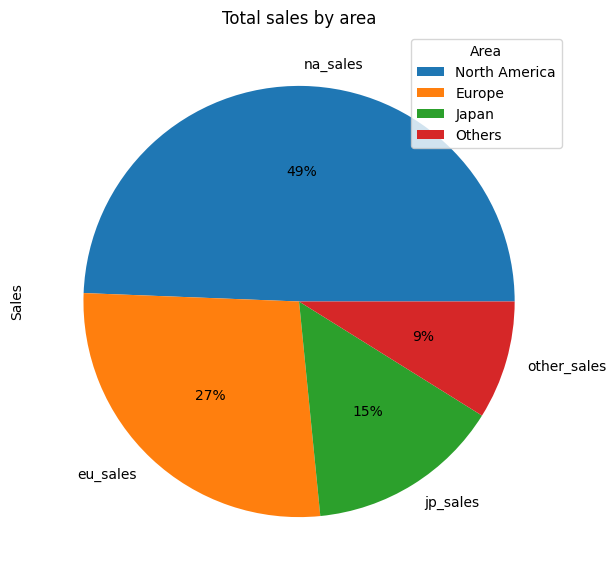

In [56]:
# Gráfico de Ingresos totales y porcentajes por área
cols_to_totl=['na_sales','eu_sales','jp_sales','other_sales']
games_total_sales_grph=games[cols_to_totl].sum().to_frame()
games_total_sales_grph=games_total_sales_grph.rename(columns={'index':'area_sales',0:'sales'})
games_total_sales_grph

games_total_sales_grph.plot.pie(y='sales',figsize=(7,7),autopct='%1.0f%%')

plt.title("Total sales by area")
plt.ylabel("Sales")
plt.legend(['North America','Europe','Japan','Others'],title="Area")

plt.show()

Se observa que las mejores ventas se presentan desde Norte américa abarcando un 49%, seguidas de Europa con el 27%, Japón con el 15% y otras regiones con 9%, sobre el total de ventas.
Esto puede deberse a la diferencia en magnitudes de población entre cada región, a su vez, las poblaciones consumidoras de videojuegos estarán sujetas a diferencias en magnitudes similares a las de poblaciones (excepto las otras regiones pero en este caso se están analizando las regiones de mejor mercado de videojuegos).

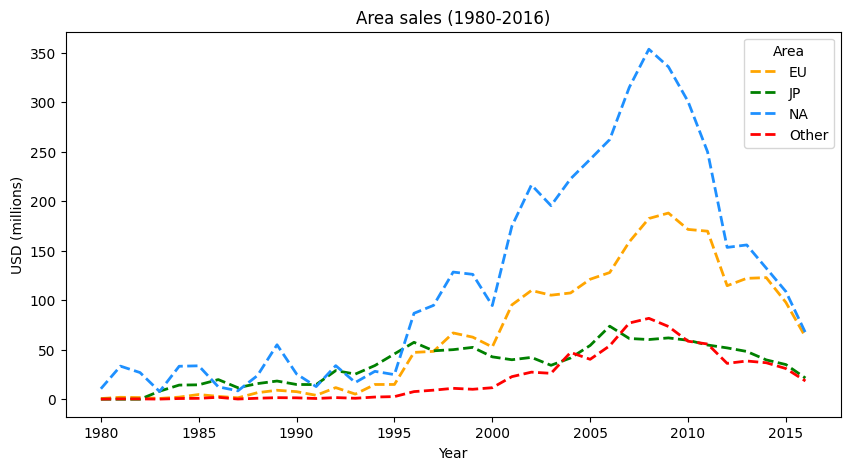

In [57]:
# Gráfico de Ingresos totales por año
vdgm_released_grp = games.pivot_table(index=['year_of_release_def'],
                              values=['na_sales','eu_sales','jp_sales','other_sales'],
                              aggfunc={'na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum'}
                             )
vdgm_released_grp


vdgm_released_grp.plot(figsize=(10,5),alpha=1,linestyle='--',linewidth='2',color=['orange','green','dodgerblue','red'])

plt.title("Area sales (1980-2016)")
plt.xlabel("Year")
plt.ylabel("USD (millions)")
plt.legend(['EU','JP','NA','Other'],title="Area")

plt.show()

Se toman en cuenta dos escenarios principales: antes de 1995 y años posteriores. Aparte de lo mencionado en el punto anterior, los años previos a 1995 representan una etapa de descubrimiento de los videojuegos (desde la década de los 1950s) y primeras propuestas para el público general. El desarrollo del segmento fue muy lento, siendo Norte américa y Japón las regiones que se mantuvieron en los primeros lugares de ventas. Posteriormente a 1995 la evolución del segmento de videojuegos creció de manera significativa en todas las regiones, pero en este caso, Europa se convierte en la segunda mejor región en cuanto al consumo, superando a Japón y quedando por debajo de Norte américa.

Al final del gráfico se aprecia un declive en todas las regiones pero debemos tomar en cuenta que la información no contempla la década de los 2010s completa por lo que comparando con la década de los 2000s a nivel de ventas (2614.36 millones de dólares y 4633.23 millones de dórales, respectivamente), podría asemejarse el importe de las ventas totales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen interpretación de los datos, esto permite darle mayor valor a la información que has obtenido.

</div>

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [58]:
# Juegos lanzados, ventas por área y totales, y plataformas activas por década
vdgm_released_pvt = games.pivot_table(index=['decade'],
                              values=['name','platform','na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                              aggfunc={'name':'count','platform':'nunique','na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum','total_sales':'sum'}
                             ).reset_index()
vdgm_released_pvt=vdgm_released_pvt.rename(columns={'name':'number_videogames'})
vdgm_released_pvt

,decade,eu_sales,jp_sales,na_sales,number_videogames,other_sales,platform,total_sales
0,1980s,31.81,102.47,245.48,221,7.20,4,386.96
1,1990s,283.40,372.36,577.93,1771,47.47,16,1281.16
2,2000s,1248.31,512.19,2411.36,9250,461.37,15,4633.23
3,2010s,861.15,310.35,1167.58,5473,275.28,12,2614.36


En complemento con lo anterior explicado, observamos el número de videojuegos lanzados y el número de plataformas activas en el mercado por década, demostrando el crecimiento a partir de la época de los 1990s.

In [59]:
# Juegos lanzados, ventas por área y totales, y plataformas activas por año
vdgm_released_yr_pvt = games.pivot_table(index=['year_of_release_def'],
                              values=['name','platform','na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                              aggfunc={'name':'count','platform':'nunique','na_sales':'sum','eu_sales':'sum','jp_sales':'sum','other_sales':'sum','total_sales':'sum'}
                             ).reset_index()
vdgm_released_yr_pvt

,year_of_release_def,eu_sales,jp_sales,na_sales,name,other_sales,platform,total_sales
0,1980,0.67,0.00,10.59,9,0.12,1,11.38
1,1981,1.96,0.00,33.40,46,0.32,1,35.68
2,1982,1.65,0.00,26.92,36,0.31,1,28.88
3,1983,0.80,8.10,7.76,17,0.14,2,16.80
4,1984,2.10,14.27,33.28,14,0.70,2,50.35
5,1985,4.74,14.54,33.73,13,0.92,3,53.93
6,1986,2.84,19.81,12.50,21,1.93,2,37.08
7,1987,1.41,11.63,8.46,16,0.20,2,21.70
8,1988,6.59,15.76,23.87,15,0.99,4,47.21
9,1989,9.05,18.36,54.97,34,1.57,3,83.95


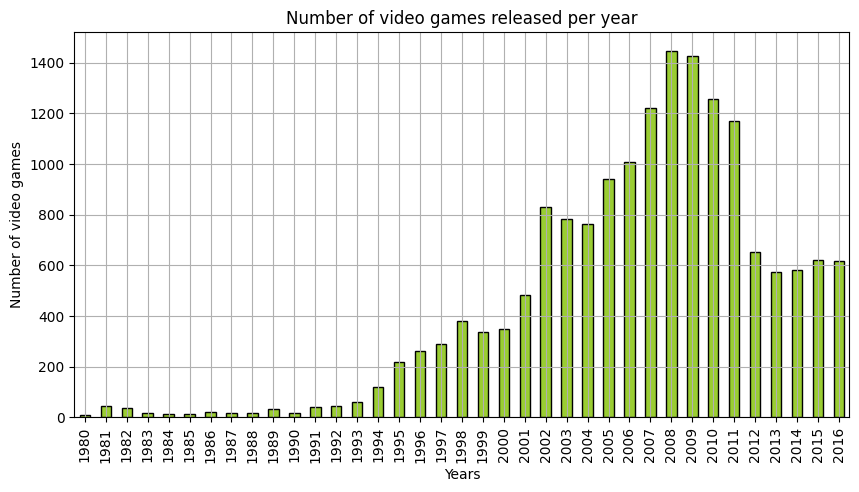

In [60]:
# Juegos lanzados por año
vdgm_released_yr_pvt = games.pivot_table(index=['year_of_release_def'],
                              values=['name'],
                              aggfunc={'name':'count'}
                             )

vdgm_released_yr_pvt.plot(figsize=(10,5),color='yellowgreen', legend=False, kind='bar', ec='black', grid=True)

plt.title("Number of video games released per year")
plt.xlabel("Years")
plt.ylabel("Number of video games")

plt.show()

Se presenta el gráfico de la información explicada anteriormente por años.

### Observa cómo varían las ventas de una plataforma a otra.

Para el presente punto es importante comentar que siendo los primeros años una etapa de desarrollo inicial del mercado de videojuegos, muchos desarrolladores pioneros o experimentales, no continuaron en el mercado de creación de plataformas en años posteriores.

In [61]:
# Ventas por plataforma y desarrollador, y año de primer lanzamiento
sls_pltfrm_yrs_pvt = games.pivot_table(index=['developer','platform'],
                                       values=['total_sales','year_of_release_def'],
                                       aggfunc={'total_sales':'sum','year_of_release_def':'min'}
                                       ).fillna(0)
sls_pltfrm_yrs_pvt.sort_values(['developer','total_sales'],ascending=False).reset_index()

,developer,platform,total_sales,year_of_release_def
0,The 3DO Company,3DO,0.10,1994
1,Sony,PS2,1255.77,2000
2,Sony,PS3,939.65,2006
3,Sony,PS,730.86,1994
4,Sony,PS4,314.14,2013
5,Sony,PSP,294.05,2004
6,Sony,PSV,54.07,2011
7,Sega,SAT,33.59,1994
8,Sega,GEN,30.77,1990
9,Sega,DC,15.95,1998


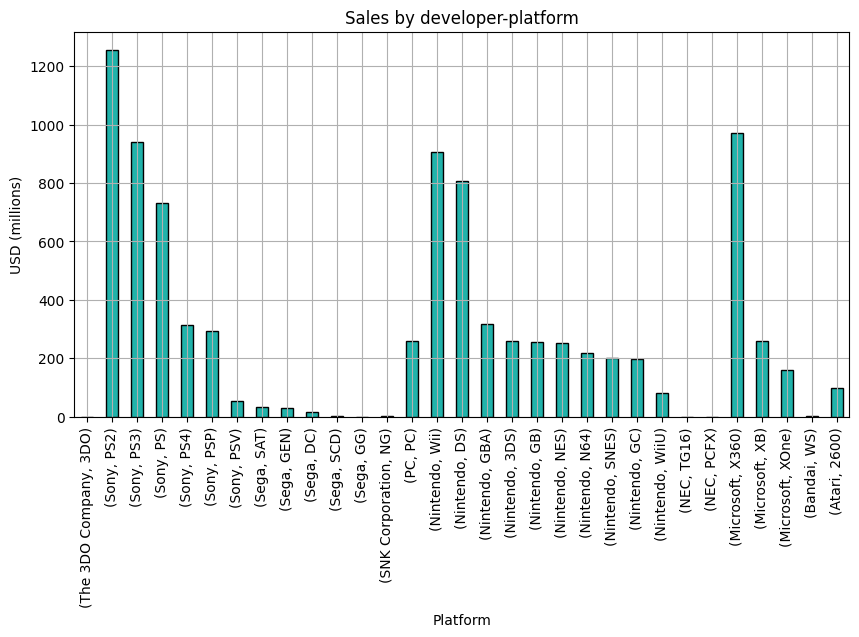

In [62]:
# Gráfico de Ventas por plataforma y desarrollador
sls_pltfrm_yrs_grph = games.pivot_table(index=['developer','platform'],
                                       values=['total_sales'],
                                       aggfunc={'total_sales':'sum'}
                                       ).fillna(0)
sls_pltfrm_yrs_grph=sls_pltfrm_yrs_grph.sort_values(['developer','total_sales'],ascending=False)

sls_pltfrm_yrs_grph.plot(figsize=(10,5),color='lightseagreen', legend=False, kind='bar', ec='black',grid=True)

plt.title("Sales by developer-platform")
plt.xlabel("Platform")
plt.ylabel("USD (millions)")

plt.show()



En conclusión al presente punto, se deduce que los desarrolladores más importantes son: Sony, Nintendo y Microsoft. Sin dejar de mencionar a Sega que aunque no alcanzó relevancia comercial a nivel de ventas, fue el desarrollador con diversas propuestas de plataformas de 1990 a 1998. Se presenta el gráfico.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente forma de presentar la información, tal vez valdría la pena darles un idenditficador de color para hacer más fácil la interpretación de los datos.

</div>

### Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año.

Se considera un listado de las mejores 5 plataformas a nivel de ventas totales.

In [63]:
# Elección de Top5 de plataformas con mejores ventas
t5_sls_pltfrm_yrs_pvt = games.pivot_table(index=['developer','platform'],
                                       values=['total_sales','year_of_release_def'],
                                       aggfunc={'total_sales':'sum','year_of_release_def':'min'}
                                       ).fillna(0)
t5_sls_pltfrm_yrs_pvt=t5_sls_pltfrm_yrs_pvt.sort_values('total_sales',ascending=False).head(5)
t5_sls_pltfrm_yrs_pvt

total_sales  year_of_release_def
developer platform                                  
Sony      PS2           1255.77                 2000
Microsoft X360           971.42                 2005
Sony      PS3            939.65                 2006
Nintendo  Wii            907.51                 2006
          DS             806.12                 2004

In [64]:
# Filtro de Top5 de plataformas con mejores ventas
t5_sls_yrs_fltr=games.query("platform==['PS2','X360','PS3','Wii','DS']")

In [65]:
# Desglose de ventas por año de Top5
t5_sls_yrs_pvt = t5_sls_yrs_fltr.pivot_table(index=['year_of_release_def'],
                                             columns=['platform'],
                                       values=['total_sales'],
                                       aggfunc={'total_sales':'sum'}
                                       ).fillna(0)
t5_sls_yrs_pvt

total_sales                                
platform                     DS     PS2     PS3     Wii    X360
year_of_release_def                                            
2000                       0.00   39.17    0.00    0.00    0.00
2001                       0.00  166.43    0.00    0.00    0.00
2002                       0.00  205.38    0.00    0.00    0.00
2003                       0.00  184.31    0.00    0.00    0.00
2004                      17.27  211.81    0.00    0.00    0.00
2005                     130.14  160.66    0.00    0.00    8.25
2006                     119.81  103.42   20.96  137.15   51.62
2007                     146.94   75.99   73.19  152.77   95.41
2008                     145.31   53.90  118.52  171.32  135.26
2009                     119.54   26.40  130.93  206.97  120.29
2010                      85.04    5.64  142.17  127.95  170.03
2011                      26.18   22.66  156.78   59.65  143.84
2012                      11.01    0.00  107.36   21.71   99.74
2013                       4.88    0.00  113.25    8.59   88.58
2014                       0.00    0.00   47.76    3.75   34.74
2015                       0.00    0.00   16.82    1.14   11.96
2016                       0.00    0.00   11.91   16.51   11.70

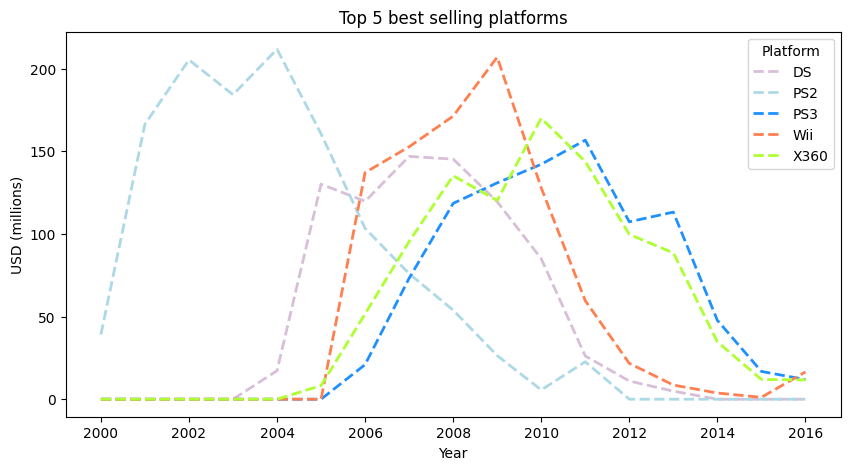

In [66]:
# Gráfico de ventas por año de Top5
t5_sls_yrs_pvt.plot(figsize=(10,5),alpha=1,linestyle='--',linewidth='2',color=['thistle','lightblue','dodgerblue','coral','greenyellow'])

plt.title("Top 5 best selling platforms")
plt.xlabel("Year")
plt.ylabel("USD (millions)")
plt.legend(['DS','PS2','PS3','Wii','X360'],title="Platform")

plt.show()

Se presenta el gráfico de las 5 plataformas con mejor éxito comercial de 1980 a 2016, se observan los periodos de crecimiento y declive, así como los puntos más altos en ventas, según los lanzamientos de videojuegos por plataforma, siendo PS2 el más exitoso, seguido de X360, PS3, Wii y DS.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Es correcto, se observa una consistencia en el periodo de vida de una consola a patir de los 2000

</div>

### Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

Similarmente al punto anterior, se toma un listado de 5 plataformas exitosas omitiendo las que siguen con lanzamientos vigentes en 2016, por lo que seguimos considerando a DS y PS2, complementados con PS, GBA y PSP.

In [67]:
# Elección de Top5 de plataformas populares, descontinuadas al 2016
t5_fam_pltfrm_yrs_pvt = games.pivot_table(index=['developer','platform'],
                                       values=['total_sales','year_of_release_def'],
                                       aggfunc={'total_sales':'sum','year_of_release_def':'max'}
                                       ).fillna(0)
t5_fam_pltfrm_yrs_pvt=t5_fam_pltfrm_yrs_pvt.sort_values('total_sales',ascending=False)
t5_fam_pltfrm_yrs_pvt=t5_fam_pltfrm_yrs_pvt.query("year_of_release_def<2016")
t5_fam_pltfrm_yrs_pvt.head(5)

,,total_sales,year_of_release_def
developer,platform,,
Sony,PS2,1255.77,2011
Nintendo,DS,806.12,2013
Sony,PS,730.86,2003
Nintendo,GBA,317.85,2007
Sony,PSP,294.05,2015


In [68]:
# Filtro de Top5 de plataformas populares, descontinuadas al 2016
t5_fam_discont_yrs_fltr=games.query("platform==['PS2','DS','PS','GBA','PSP']")

In [69]:
# Desglose de Top5 de plataformas populares, descontinuadas al 2016 por año
t5_fam_discont_yrs_pvt = t5_fam_discont_yrs_fltr.pivot_table(index=['year_of_release_def'],
                                             columns=['platform'],
                                       values=['total_sales'],
                                       aggfunc={'total_sales':'sum'}
                                       ).fillna(0)
t5_fam_discont_yrs_pvt

total_sales                              
platform                     DS    GBA      PS     PS2    PSP
year_of_release_def                                          
1994                       0.00   0.00    6.03    0.00   0.00
1995                       0.00   0.00   35.96    0.00   0.00
1996                       0.00   0.00   94.70    0.00   0.00
1997                       0.00   0.00  136.17    0.00   0.00
1998                       0.00   0.00  169.49    0.00   0.00
1999                       0.00   0.00  144.53    0.00   0.00
2000                       0.00   0.07   96.37   39.17   0.00
2001                       0.00  61.53   35.59  166.43   0.00
2002                       0.00  74.16    6.67  205.38   0.00
2003                       0.00  56.67    5.35  184.31   0.00
2004                      17.27  77.91    0.00  211.81   7.06
2005                     130.14  33.86    0.00  160.66  43.84
2006                     119.81   5.28    0.00  103.42  55.32
2007                     146.94   8.37    0.00   75.99  46.93
2008                     145.31   0.00    0.00   53.90  34.55
2009                     119.54   0.00    0.00   26.40  37.78
2010                      85.04   0.00    0.00    5.64  35.04
2011                      26.18   0.00    0.00   22.66  17.82
2012                      11.01   0.00    0.00    0.00   7.69
2013                       4.88   0.00    0.00    0.00   3.14
2014                       0.00   0.00    0.00    0.00   0.24
2015                       0.00   0.00    0.00    0.00   4.64

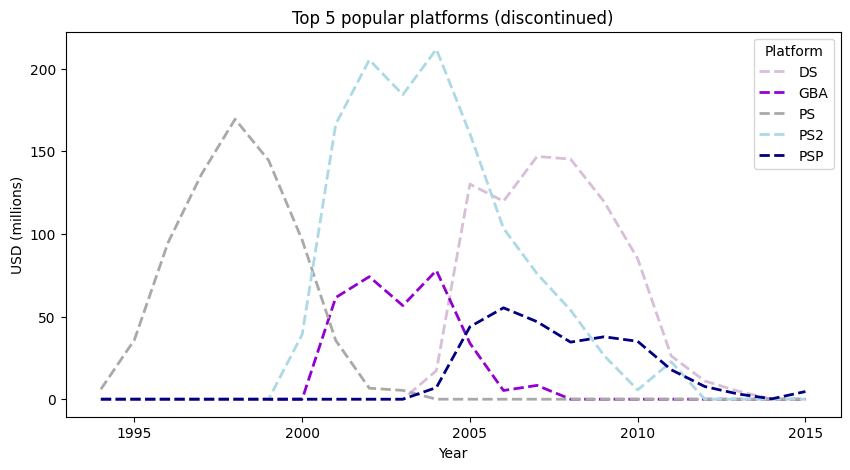

In [70]:
# Gráfico de Top5 de plataformas populares, descontinuadas al 2016 por año
t5_fam_discont_yrs_pvt.plot(figsize=(10,5),alpha=1,linestyle='--',linewidth='2',color=['thistle','darkviolet','darkgray','lightblue','navy'])

plt.title("Top 5 popular platforms (discontinued)")
plt.xlabel("Year")
plt.ylabel("USD (millions)")
plt.legend(['DS','GBA','PS','PS2','PSP'],title="Platform")

plt.show()

Se presenta el gráfico de las 5 plataformas con mejor éxito comercial de 1980 a 2015 (descontinuadas al 2016), se observan los periodos de crecimiento y declive, así como los puntos más altos en ventas, según los lanzamientos de videojuegos por plataforma, siendo PS2 el más exitoso, seguido de DS, PS, GBA y PSP.

### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

Este es un punto complicado de explicar y depende mucho de las consideraciones que se tomen en cuenta, ya que tratándose de diferentes desarrolladores y la competencia que se genera entre ellos los lanzamientos de nuevas plataformas suelen variar.
Para nuestro análisis consideraremos el desarrollador, el tipo de plataforma ("home consoles" o "handheld consoles") y el rango de años de lanzamiento de videojuegos de los 4 principales desarrolladores de plataformas (Sony, Sega, Nintendo y Microsoft).

In [71]:
# Filtro de mejores desarrolladores
dvlpr_yrs_rlsd_fltr=games.query("developer==['Microsoft','Nintendo','Sega','Sony']")

In [72]:
# Comparación de rango de tiempo de lanzamientos por desarrollador y plataforma
dvlpr_yrs_rlsd_pvt = dvlpr_yrs_rlsd_fltr.pivot_table(index=['developer','platform'],
                                       values='year_of_release_def',
                                       aggfunc={'year_of_release_def':['min','max']}
                                       ).fillna(0)
dvlpr_yrs_rlsd_pvt['years_range']=dvlpr_yrs_rlsd_pvt['max']-dvlpr_yrs_rlsd_pvt['min']
dvlpr_yrs_rlsd_pvt=dvlpr_yrs_rlsd_pvt.sort_values(['developer','min'],ascending=False).reset_index()
dvlpr_yrs_rlsd_pvt

,developer,platform,max,min,years_range
0,Sony,PS4,2016,2013,3
1,Sony,PSV,2016,2011,5
2,Sony,PS3,2016,2006,10
3,Sony,PSP,2015,2004,11
4,Sony,PS2,2011,2000,11
5,Sony,PS,2003,1994,9
6,Sega,DC,2008,1998,10
7,Sega,SAT,1999,1994,5
8,Sega,SCD,1994,1993,1
9,Sega,GG,1992,1992,0


Sega lanzaba una plataforma prácticamente cada año con excepción del Dreamcast que tardó 4 años con referencia en su predecesora. Los periodos de lanzamiento de videojuegos fluctúan mucho, desde hacer lanzamientos únicamente en el año de lanzamiento de la plataforma hasta una actividad de 10 años de lanzamientos en el caso de Dreamcast.

Los otros tres desarrolladores siguen activos y presentan casos relevantes.

Nintendo cuenta con plataformas de casa, desde el NES en 1983, SNES en 1990, N64 en 1996, GC en 2001, Wii en 2006 y WiiU en 2012, lo que corresponde a rangos de 5 a 7 años entre una plataforma y su sucesora.

Nintendo se desarrolló también en un mercado importante para las consolas portátiles desde 1988 con el Game Boy durando 13 años en el mercado. Posteriormente Game Boy Advance en el 2000, DS en 2004 y 3DS en 2011. Esto resulta en periodos irregulares desde 4 a 12 años de distancia (de 4 a 7 años en las plataformas más recientes).

Sony generó competencia en portátiles con Nintendo con PSP en 2004 y PSV en 2011 contra DS y 3DS respectivamente, 5 años de rango en ambos casos de desarrolladores.

Por otro lado, Sony compite con Microsoft en cuanto a las plataformas de casa, PS en 1994, PS2 contra X-Box en el 2000 , PS3 contra X360 en 2006 y 2005 respectivamente y PS4 y XOne en 2013, con rangos de años entre plataformas de 6 a 8.

Considerando que esta competencia también incluye a las plataformas de casa de Nintendo con sólo un año de diferencia en cuanto al lanzamiento de cada plataforma.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Oscar has dado respuesta a esta pregunta de una manera clara y detallada, muy buen trabajo.

</div>

### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Se opta por las plataformas con lanzamientos activos de videojuegos en la década de los 2010s.

In [73]:
# Comparación de plataformas por ventas totales y último año de lanzamiento de títulos
pltfrm_f17_pvt = games.pivot_table(index=['developer','platform'],
                                       values=['total_sales','year_of_release_def'],
                                       aggfunc={'total_sales':'sum','year_of_release_def':'max'}
                                       ).fillna(0)
pltfrm_f17_pvt.sort_values(['year_of_release_def'],ascending=False).reset_index()

,developer,platform,total_sales,year_of_release_def
0,Nintendo,Wii,907.51,2016
1,Microsoft,X360,971.42,2016
2,Sony,PS3,939.65,2016
3,Microsoft,XOne,159.32,2016
4,Sony,PS4,314.14,2016
5,Sony,PSV,54.07,2016
6,Nintendo,3DS,259.00,2016
7,PC,PC,259.52,2016
8,Nintendo,WiiU,82.19,2016
9,Sony,PSP,294.05,2015


Seleccionamos los casos que consideran títulos can lanzamientos de 2010 en adelante.

### Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

Obtenemos los datos según las condiciones anteriores. Esto considerará únicamente a los 3 desarrolladores más importantes de plataformas (Sony, Nintendo, Microsoft) y PC.

In [74]:
# filtro de plataformas por mejores ventas totales y último año de lanzamiento de títulos durante década de 2010s. DF Games17
games17=games.query("platform==['Wii','X360','PS3','XOne','PS4','PSV','3DS','PC','WiiU','PSP','DS','PS2'] & year_of_release_def>2009")
games17

,name,platform,year_of_release_def,genre,decade,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,user_score_to_100,rating_def,developer,platform_name,times_released,num_years_release
14,Kinect Adventures!,X360,2010,Misc,2010s,15.00,4.89,0.24,1.69,21.82,61.0,6.3,63.0,E,Microsoft,Xbox 360,1,1
16,Grand Theft Auto V,PS3,2013,Action,2010s,7.02,9.09,0.98,3.96,21.05,97.0,8.2,82.0,M,Sony,Play Station 3,5,3
23,Grand Theft Auto V,X360,2013,Action,2010s,9.66,5.14,0.06,1.41,16.27,97.0,8.1,81.0,M,Microsoft,Xbox 360,5,3
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,2010s,5.51,3.17,5.65,0.80,15.13,71.0,7.5,75.0,NaN,Nintendo,Game Boy DS,1,1
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,2010s,9.04,4.24,0.13,1.32,14.73,88.0,3.4,34.0,M,Microsoft,Xbox 360,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,75.0,NaN,Sony,Play Station Vita,1,1
16707,Aiyoku no Eustia,PSV,2014,Misc,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,75.0,NaN,Sony,Play Station Vita,1,1
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,75.0,NaN,Sony,Play Station 3,3,1
16712,Haitaka no Psychedelica,PSV,2016,Adventure,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,75.0,NaN,Sony,Play Station Vita,1,1


Se presenta la información de 5,473 filas a considerar.

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Presentamos el listado a partir del DF Games17 para observar el comportamiento de las ventas.

In [75]:
# Comparación de ventas de plataformas Games17
pltfrm_f17_lead_pvt = games17.pivot_table(index=['developer','platform'],
                                       values=['total_sales'],
                                       aggfunc={'total_sales':'sum'}
                                       ).fillna(0)
pltfrm_f17_lead_pvt

total_sales
developer platform             
Microsoft X360           560.59
          XOne           159.32
Nintendo  3DS            259.00
          DS             127.11
          Wii            239.30
          WiiU            82.19
PC        PC             125.72
Sony      PS2             28.30
          PS3            596.05
          PS4            314.14
          PSP             68.57
          PSV             54.07

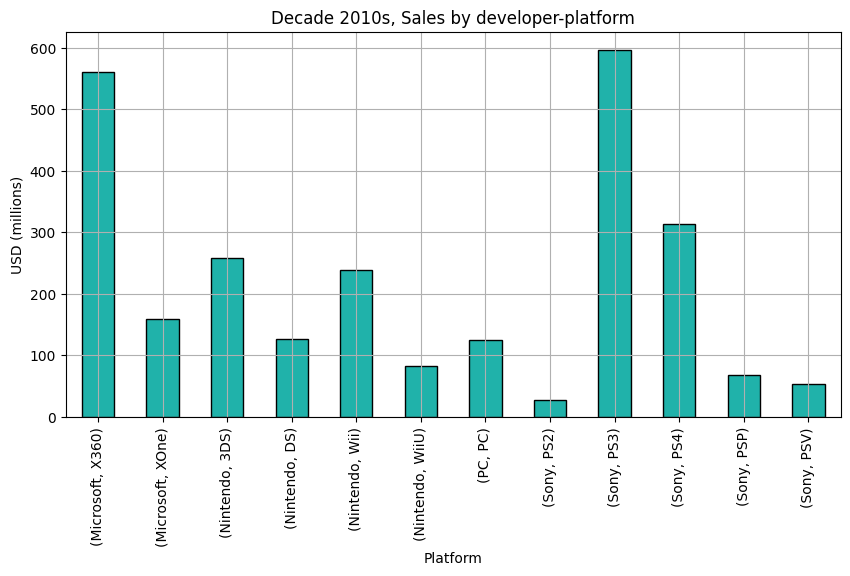

In [76]:
# Gráfico de ventas de plataformas Games17
pltfrm_f17_lead_pvt.plot(figsize=(10,5),color='lightseagreen', legend=False, kind='bar', ec='black', grid=True)

plt.title("Decade 2010s, Sales by developer-platform")
plt.xlabel("Platform")
plt.ylabel("USD (millions)")

plt.show()

Se presenta gráfico observando que las plataformas de mejores resultados a nivel de ventas son X360 y PS3 superando los 500 millones de dólares. Esto deduce que ambas han cursado su mejor periodo de rentabilidad, contra XOne y PS4 que las suceden y van en desarrollo para el presente periodo. 

Se hace evidente que las competidoras por parte de Nintendo se alejan de dicho nivel de ventas, siendo extrañamente la portátil 3DS la que mejor compite a nivel de ventas, despegándose de su segmento de portátiles.

A continuación se presentarán los gráficos de ventas para el periodo de los 2010s en ambos casos de tipos de plataformas.

In [77]:
# Filtro de plataformas "Home" con mejores ventas en Games17
pltfrm_hm_f17_lead_yrs_fltr=games17.query("platform==['X360','XOne','Wii','WiiU','PS2','PS3','PS4','PC']")

In [78]:
# Resumen de ventas por año de las mejores plataformas "Home" Games17
pltfrm_hm_f17_lead_yrs_pvt = pltfrm_hm_f17_lead_yrs_fltr.pivot_table(index=['year_of_release_def'],
                                              columns=['platform'],
                                              values=['total_sales'],
                                              aggfunc={'total_sales':'sum'}
                                             ).fillna(0)
pltfrm_hm_f17_lead_yrs_pvt

total_sales                                                \
platform                     PC    PS2     PS3     PS4     Wii   WiiU    X360   
year_of_release_def                                                             
2010                      24.28   5.64  142.17    0.00  127.95   0.00  170.03   
2011                      35.03  22.66  156.78    0.00   59.65   0.00  143.84   
2012                      23.22   0.00  107.36    0.00   21.71  17.56   99.74   
2013                      12.38   0.00  113.25   25.99    8.59  21.65   88.58   
2014                      13.28   0.00   47.76  100.00    3.75  22.03   34.74   
2015                       8.52   0.00   16.82  118.90    1.14  16.35   11.96   
2016                       9.01   0.00   11.91   69.25   16.51   4.60   11.70   

                            
platform              XOne  
year_of_release_def         
2010                  0.00  
2011                  0.00  
2012                  0.00  
2013                 18.96  
2014                 54.07  
2015                 60.14  
2016                 26.15

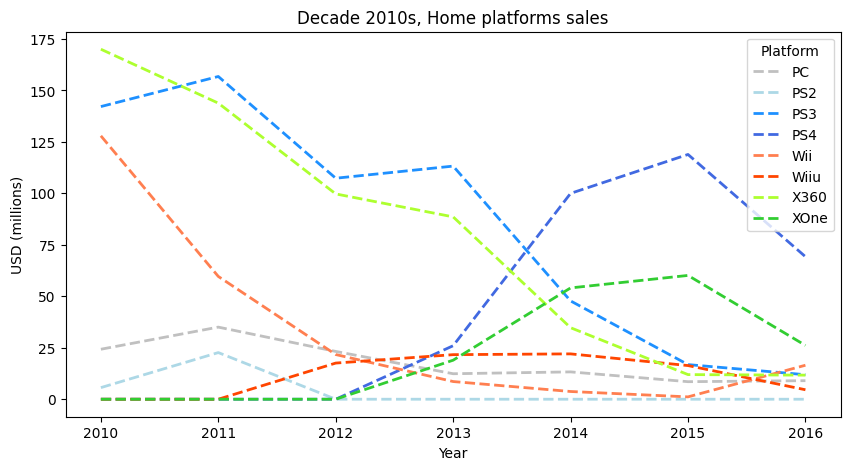

In [79]:
# Gráfico de ventas por año de las mejores plataformas "Home" Games17
pltfrm_hm_f17_lead_yrs_pvt.plot(figsize=(10,5),alpha=1,linestyle='--',linewidth='2',color=['silver','lightblue','dodgerblue','royalblue','coral','orangered','greenyellow','limegreen'])

plt.title("Decade 2010s, Home platforms sales")
plt.xlabel("Year")
plt.ylabel("USD (millions)")
plt.legend(['PC','PS2','PS3','PS4','Wii','Wiiu','X360','XOne'],title="Platform")

plt.show()

La tendencia es decreciente de las plataformas de casa de los 3 desarrolladores (X360, PS3 y Wii), por otro lado sus sucesoras van en crecimiento a partir de 2011 y 2012 (WiiU, XOne y PS4).

El caso de PC se mantiene en sus niveles ya que depende de condiciones diferentes a las plataformas comerciales.

In [80]:
# Filtro de plataformas "Handheld" con mejores ventas en Games17
pltfrm_hh_f17_lead_yrs_fltr=games17.query("platform==['3DS','DS','PSP','PSV']")

In [81]:
# Resumen de ventas por año de las mejores plataformas "Handheld" Games17
pltfrm_hh_f17_lead_yrs_pvt = pltfrm_hh_f17_lead_yrs_fltr.pivot_table(index=['year_of_release_def'],
                                              columns=['platform'],
                                              values=['total_sales'],
                                              aggfunc={'total_sales':'sum'}
                                             ).fillna(0)
pltfrm_hh_f17_lead_yrs_pvt

total_sales                     
platform                    3DS     DS    PSP    PSV
year_of_release_def                                 
2010                       0.00  85.04  35.04   0.00
2011                      63.20  26.18  17.82   4.63
2012                      51.36  11.01   7.69  16.19
2013                      56.57   4.88   3.14  10.59
2014                      43.76   0.00   0.24  11.90
2015                      27.78   0.00   4.64   6.25
2016                      16.33   0.00   0.00   4.51

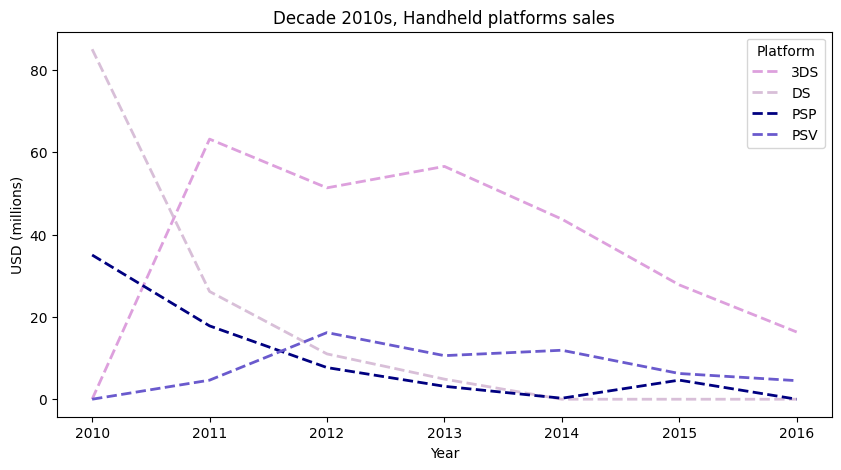

In [82]:
# Gráfico de ventas por año de las mejores plataformas "Handheld" Games17
pltfrm_hh_f17_lead_yrs_pvt.plot(figsize=(10,5),alpha=1,linestyle='--',linewidth='2',color=['plum','thistle','navy','slateblue'])

plt.title("Decade 2010s, Handheld platforms sales")
plt.xlabel("Year")
plt.ylabel("USD (millions)")
plt.legend(['3DS','DS','PSP','PSV'],title="Platform")

plt.show()

Por otro lado la tendencia es decreciente de las plataformas portátiles de Nintendo y Sony (DS y PSP), por otro lado sus sucesoras van en crecimiento a partir de 2011 (3DS y PSV).

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Genial comparación entre plataformas portables y consolas.

</div>

### Crea un diagrama de caja para las ventas globales de todos los juegos desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

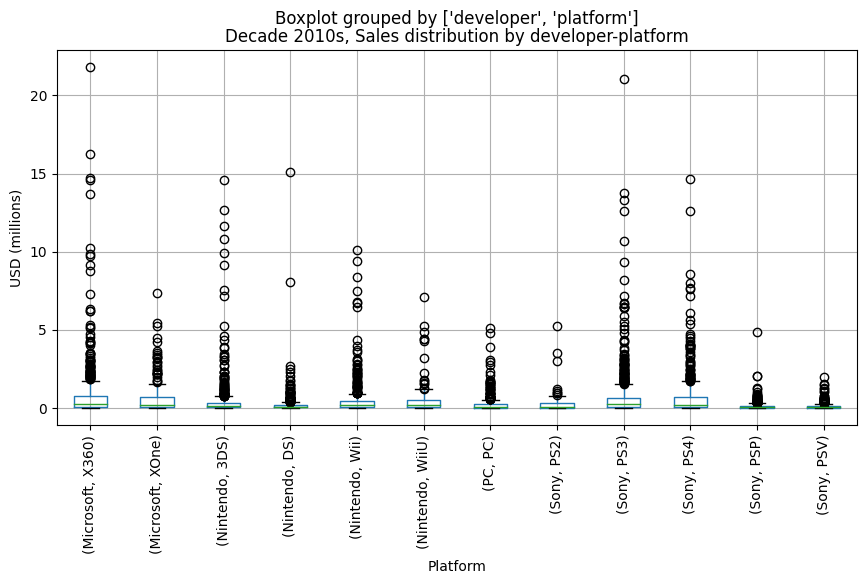

In [83]:
# Diagrama de caja Games17
games17.boxplot(column='total_sales',by=['developer','platform'],figsize=[10,5],rot=90)

plt.title("Decade 2010s, Sales distribution by developer-platform")
plt.xlabel("Platform")
plt.ylabel("USD (millions)")

plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como sugerencia, cuando tengas gráficas *box-plot* con cajas muy "estrechas" debido a la presencia de numerosos datos atípicos, considera incluir una versión adicional usando escala logarítmica. Esto facilitará la comparación y el análisis de los datos.

</div>

El gráfico demuestra que hay un alto número de valores atípicos referentes a las ventas por plataforma. Debido a ello haremos un filtro que separe el 75% de los valores de menor a mayor para que puedan ser más observables las cajas y bigotes de los datos.

In [84]:
# Descripción de volúmenes de datos para un mejor análisis
tst_ttl_sls_vg=games17['total_sales'].describe()
tst_ttl_sls_vg

count    5473.000000
mean        0.477683
std         1.220133
min         0.010000
25%         0.040000
50%         0.130000
75%         0.400000
max        21.820000
Name: total_sales, dtype: float64

In [85]:
# Separación de volúmenes de datos por cuartiles (25% de valores máximos) Games17
tst_ttl_sls_vg_fltr=games17.query("total_sales>=0.4")

# Separación de volúmenes de datos por cuartiles (75% de valores mínimos) Games17
tst_ttl_sls_vg_fltr_2=games17.query("total_sales<0.4")

In [86]:
# sumas y cuentas de ambos filtros
print("Suma del 25% de valores máximos de Games17:",tst_ttl_sls_vg_fltr['total_sales'].sum())
print("Conteo del 25% de valores máximos de Games17:",tst_ttl_sls_vg_fltr['total_sales'].count())
print("Suma del 75% de valores mínimos de Games17:",tst_ttl_sls_vg_fltr_2['total_sales'].sum())
print("Conteo del 75% de valores mínimos de Games17:",tst_ttl_sls_vg_fltr_2['total_sales'].count())

print("Total de ventas",games17['total_sales'].sum())
print("Conteo de registros:",games17['total_sales'].count())

Suma del 25% de valores máximos de Games17: 2149.81
Conteo del 25% de valores máximos de Games17: 1371
Suma del 75% de valores mínimos de Games17: 464.55000000000007
Conteo del 75% de valores mínimos de Games17: 4102
Total de ventas 2614.36
Conteo de registros: 5473


En cuanto al volumen de datos, 1,371 representan el 25% de los datos en Games17, pero la suma de las ventas totales de estos registros asciende a 2,149.81.

Por otro lado, 4,102 representan el 75% de los datos en Games17, pero la suma de las ventas totales de estos registros asciende solo a 464.55.

Por lo que se asume que el impacto en ventas totales de los datos atípicos representa el 82% del total de ingresos.

Sin tomar en cuenta el cuartil 4, el 75% de los datos se distribuye de la siguiente manera.

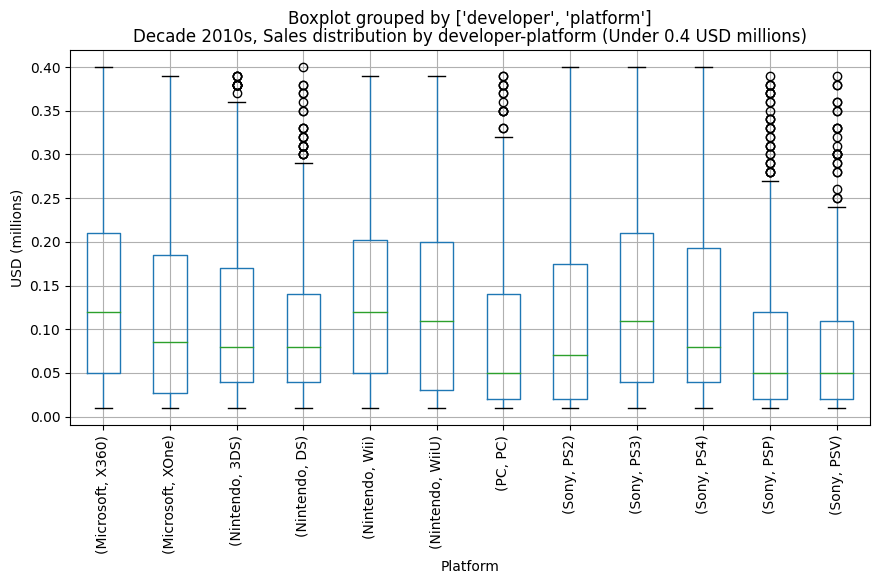

In [87]:
# Diagrama de caja Games17 del 75% de valores mínimos
tst_ttl_sls_vg_fltr_2.boxplot(column='total_sales',by=['developer','platform'],figsize=[10,5],rot=90)

plt.title("Decade 2010s, Sales distribution by developer-platform (Under 0.4 USD millions)")
plt.xlabel("Platform")
plt.ylabel("USD (millions)")

plt.show()

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Elegimos PS3, como la plataforma más exitosa en cuanto a ventas totales.

In [88]:
# DF de PS3
best_pltfrm_fltr=games17.query("platform=='PS3'")
best_pltfrm_fltr

,name,platform,year_of_release_def,genre,decade,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,user_score_to_100,rating_def,developer,platform_name,times_released,num_years_release
16,Grand Theft Auto V,PS3,2013,Action,2010s,7.02,9.09,0.98,3.96,21.05,97.0,8.2,82.0,M,Sony,Play Station 3,5,3
34,Call of Duty: Black Ops II,PS3,2012,Shooter,2010s,4.99,5.73,0.65,2.42,13.79,83.0,5.3,53.0,M,Sony,Play Station 3,4,1
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,2010s,5.54,5.73,0.49,1.57,13.33,88.0,3.2,32.0,M,Sony,Play Station 3,4,1
41,Call of Duty: Black Ops,PS3,2010,Shooter,2010s,5.99,4.37,0.48,1.79,12.63,88.0,6.4,64.0,M,Sony,Play Station 3,5,2
54,Gran Turismo 5,PS3,2010,Racing,2010s,2.96,4.82,0.81,2.11,10.70,84.0,7.5,75.0,E,Sony,Play Station 3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Akatsuki no Goei Trinity,PS3,2012,Adventure,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,75.0,NaN,Sony,Play Station 3,2,1
16638,Tour de France 2014,PS3,2014,Sports,2010s,0.00,0.01,0.00,0.00,0.01,71.0,7.5,75.0,E,Sony,Play Station 3,2,1
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,2010s,0.00,0.01,0.00,0.00,0.01,71.0,7.5,75.0,NaN,Sony,Play Station 3,1,1
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,2010s,0.00,0.00,0.01,0.00,0.01,71.0,7.5,75.0,NaN,Sony,Play Station 3,3,1


In [89]:
# Lista de títulos de PS3, calificaciones y ventas totales
best_pltfrm_pvt=best_pltfrm_fltr.pivot_table(index=['name'],
                                       values=['critic_score','user_score_to_100','total_sales'],
                                       )
best_pltfrm_pvt.sort_values('total_sales',ascending=False).head(20)

,critic_score,total_sales,user_score_to_100
name,,,
Grand Theft Auto V,97.0,21.05,82.0
Call of Duty: Black Ops II,83.0,13.79,53.0
Call of Duty: Modern Warfare 3,88.0,13.33,32.0
Call of Duty: Black Ops,88.0,12.63,64.0
Gran Turismo 5,84.0,10.70,75.0
Call of Duty: Ghosts,71.0,9.36,26.0
FIFA Soccer 13,88.0,8.17,66.0
Battlefield 3,85.0,7.17,75.0
Uncharted 3: Drake's Deception,92.0,6.74,83.0


Se presenta listado con los títulos de PS3 y sus respectivas calificaciones.

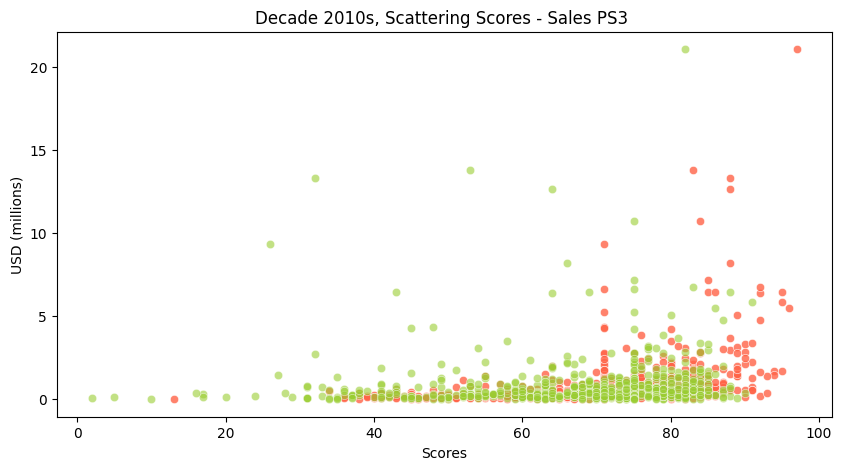

In [90]:
# Gráfico de dispersión de títulos de PS3, calificaciones y ventas totales. Rojo críticos y verde usuarios
plt.figure(figsize=(10,5))
sns.scatterplot(data=best_pltfrm_pvt,y='total_sales',x='critic_score', color='tomato',alpha=.8)
sns.scatterplot(data=best_pltfrm_pvt,y='total_sales',x='user_score_to_100', color='yellowgreen',alpha=.6)


plt.title("Decade 2010s, Scattering Scores - Sales PS3 ")
plt.xlabel("Scores")
plt.ylabel("USD (millions)")

plt.show()

Se observa en rojo la dispersión de las calificaciones de críticos y en verde las de usuarios. 

Se puede decir que existe una relación importante entre calificación y ventas sin embargo (como vimos en el diagrama de caja), los valores atípicos afectan de gran manera, por el importe de ventas de ciertos juegos (Hits), lo cual desvirtúa el nivel de relación.

In [91]:
# Matriz de correlación de títulos de PS3
best_pltfrm_corr=best_pltfrm_fltr.corr()

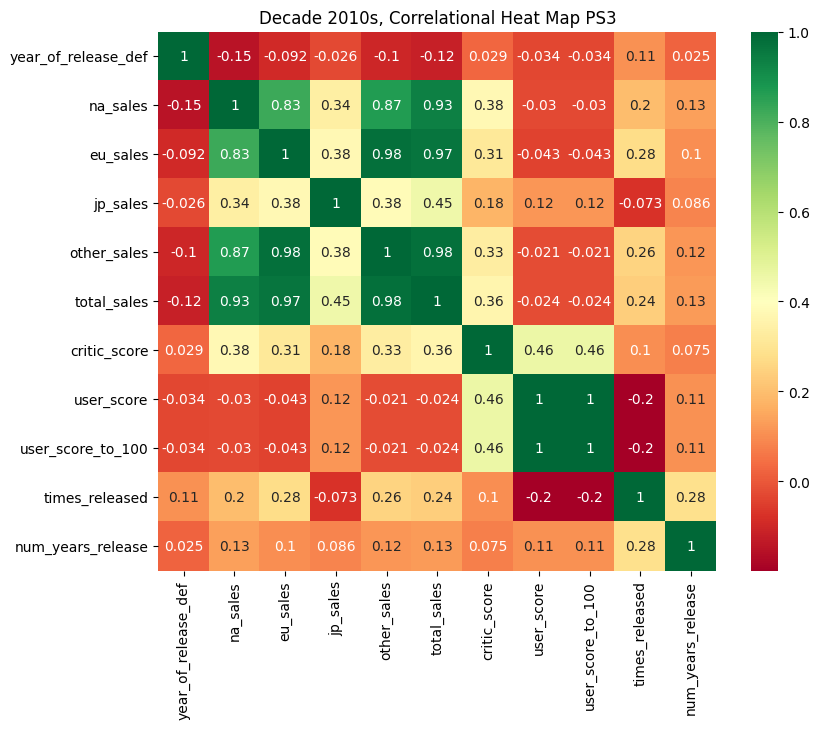

In [92]:
# Mapa de calor de títulos de PS3
plt.figure(figsize=(9,7))
sns.heatmap(best_pltfrm_corr,annot=True, cmap='RdYlGn')

plt.title("Decade 2010s, Correlational Heat Map PS3")

plt.show()

Como lo comentamos, la relación entre el total de ventas y las calificaciones se ve reducida al punto de representar un bajo nivel de correlación.

In [93]:
# Descripción de volúmenes de datos PS3
best_pltfrm_pvt.describe()

,critic_score,total_sales,user_score_to_100
count,913.000000,913.000000,913.000000
mean,70.463308,0.651440,69.860898
std,10.256418,1.441296,12.646828
min,13.000000,0.010000,2.000000
25%,71.000000,0.080000,67.000000
50%,71.000000,0.230000,75.000000
75%,74.000000,0.670000,75.000000
max,97.000000,21.050000,91.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente análisis de correlación, aunque estas se pueden clasificar como débiles si logramos ver una tendencia proporcional entre variables como el *user_score* y las ventas por región o totales.

</div>

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

Se eligen los 5 títulos con un nivel de ventas alto y variedad en plataformas.

In [94]:
# Elección del Top5 de juegos con mejores ventas y mayor variedad en plataformas Games17
vg_multiple_rls_fltr=games17.query("times_released>1")
vg_multiple_rls_pvt=vg_multiple_rls_fltr.pivot_table(index=['name'],
                                                    values=['times_released','total_sales'],
                                                    aggfunc={'times_released':'count','total_sales':'sum'},
                                                    )
vg_multiple_rls_pvt=vg_multiple_rls_pvt.sort_values(['total_sales','times_released'],ascending=False).reset_index().head()
vg_multiple_rls_pvt

,name,times_released,total_sales
0,Grand Theft Auto V,5,56.58
1,Call of Duty: Black Ops,5,30.82
2,Call of Duty: Modern Warfare 3,4,30.60
3,Call of Duty: Black Ops II,4,29.40
4,Call of Duty: Ghosts,6,27.39


In [95]:
# Ventas totales por plataforma del Top5 de juegos con mejores ventas y mayor diversidad en plataformas Games17
t5_multiple_rls_best_sls=['Grand Theft Auto V','Call of Duty: Black Ops','Call of Duty: Modern Warfare 3','Call of Duty: Black Ops II','Call of Duty: Ghosts']

t5_multiple_rls_best_sls_fltr =games17[games17['name'].isin(t5_multiple_rls_best_sls)].reset_index()
t5_multiple_rls_best_sls_pvt=t5_multiple_rls_best_sls_fltr.pivot_table(index=['name','genre'],
                                                                    columns=['platform'],
                                                                    values=['total_sales'],
                                                                    aggfunc={'total_sales':'sum'},
                                                                      ).fillna(0)
t5_multiple_rls_best_sls_pvt

total_sales                            \
platform                                        DS    PC    PS3    PS4   Wii   
name                           genre                                           
Call of Duty: Black Ops        Shooter        0.58  1.62  12.63   0.00  1.37   
Call of Duty: Black Ops II     Shooter        0.00  1.52  13.79   0.00  0.00   
Call of Duty: Ghosts           Shooter        0.00  0.69   9.36   3.83  0.00   
Call of Duty: Modern Warfare 3 Shooter        0.00  1.71  13.33   0.00  0.83   
Grand Theft Auto V             Action         0.00  1.17  21.05  12.62  0.00   

                                                           
platform                                WiiU   X360  XOne  
name                           genre                       
Call of Duty: Black Ops        Shooter  0.00  14.62  0.00  
Call of Duty: Black Ops II     Shooter  0.41  13.68  0.00  
Call of Duty: Ghosts           Shooter  0.35  10.24  2.92  
Call of Duty: Modern Warfare 3 Shooter  0.00  14.73  0.00  
Grand Theft Auto V             Action   0.00  16.27  5.47

Así también, se presentan los datos por plataforma.

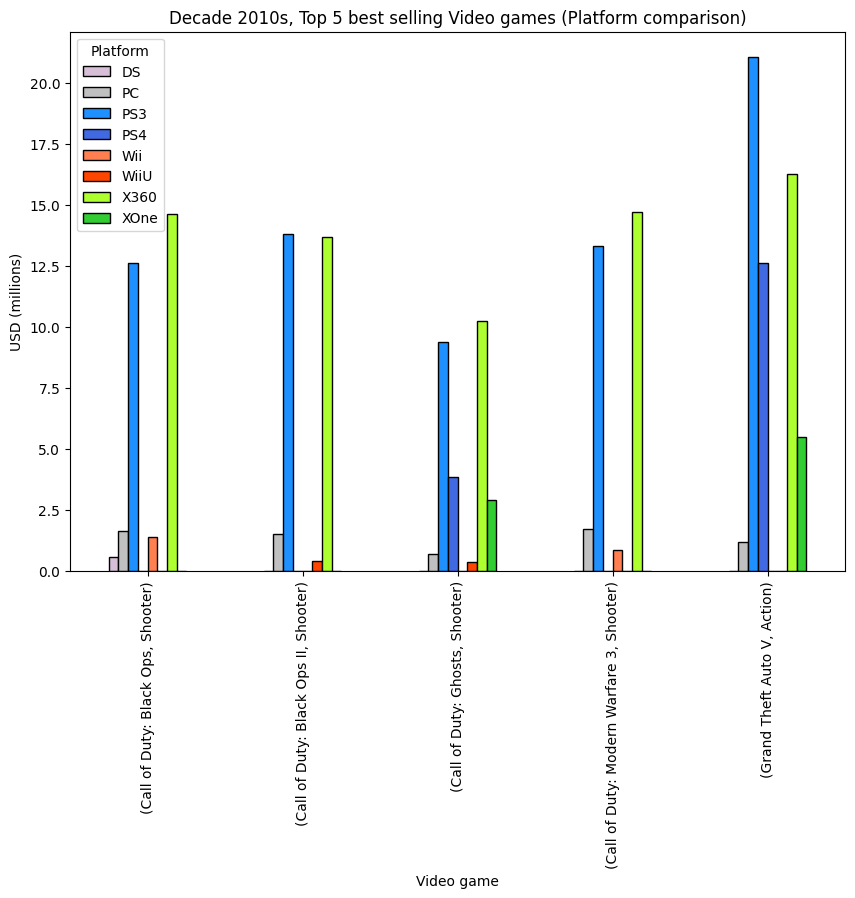

In [96]:
# Gráfico de ventas totales por plataforma del Top5 de juegos con mejores ventas y mayor diversidad en plataformas Games17
t5_multiple_rls_best_sls_pvt.plot(figsize=(10,7), kind='bar', ec='black',color=['thistle','silver','dodgerblue','royalblue','coral','orangered','greenyellow','limegreen'])

plt.title("Decade 2010s, Top 5 best selling Video games (Platform comparison)")
plt.xlabel("Video game")
plt.ylabel("USD (millions)")
plt.legend(['DS','PC','PS3','PS4','Wii','WiiU','X360','XOne'], title='Platform')

plt.show()

Aun cuando son títulos que se lanzaron en múltiples plataformas, se confirma que estos títulos son adquiridos por usuarios de plataformas de Sony y Microsoft y debido a sus periodos de lanzamiento, PS3 y X360 son las de mayor uso.

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [97]:
# Comparación de ventas totales por género Games17
bests_genre_pvt=games17.pivot_table(index=['genre'],
                                   values=['total_sales'],
                                   aggfunc='sum'
                                   )
bests_genre_pvt=bests_genre_pvt.sort_values('total_sales',ascending=False)
bests_genre_pvt

,total_sales
genre,
Action,692.41
Shooter,485.91
Sports,345.46
Role-Playing,318.31
Misc,245.58
Racing,126.81
Platform,120.69
Fighting,85.26
Simulation,73.76


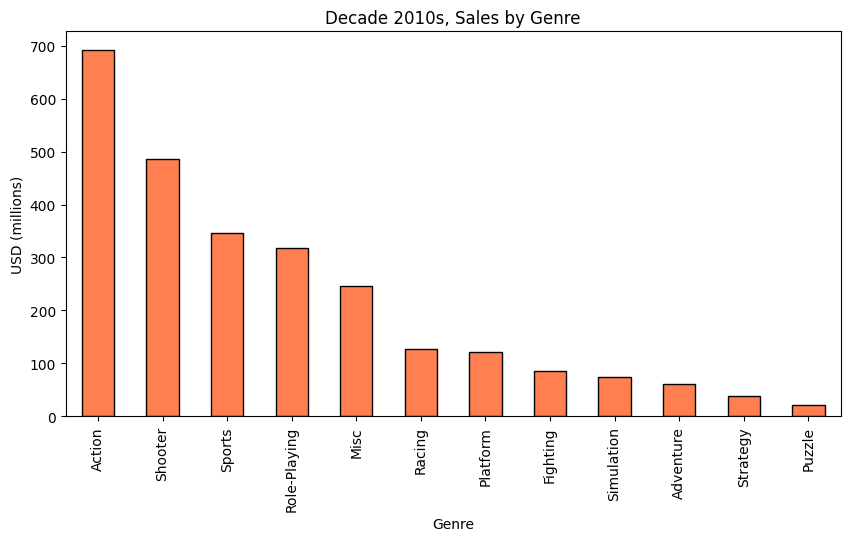

In [98]:
# Gráfico de ventas totales por género Games17
bests_genre_pvt.plot(figsize=(10,5),color='coral', legend=False, kind='bar', ec='black')

plt.title("Decade 2010s, Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("USD (millions)")

plt.show()

El presente gráfico muestra el nivel de ventas totales por género, considerando action y shooter los más importantes y dentro de los cuales queda el análisis anterior.

# Paso 4. Crea un perfil de usuario para cada región

### Para cada región (NA, UE, JP) determina:

Creamos los listados para obtener los Top5 por región que se solicitan posteriormente.

In [99]:
# Mejores ventas de plataforma por área
t5_plt_area=games17.pivot_table(index='platform',
                             values=['na_sales','eu_sales','jp_sales'],
                             aggfunc='sum'
                            ).fillna(0)

# Condiciones por plataforma
#t5_plt_area=t5_plt_area.sort_values('eu_sales',ascending=False)
#t5_plt_area=t5_plt_area.sort_values('jp_sales',ascending=False)
t5_plt_area=t5_plt_area.sort_values('na_sales',ascending=False)
t5_plt_area

,eu_sales,jp_sales,na_sales
platform,,,
X360,165.85,5.59,340.91
PS3,216.68,60.04,232.61
Wii,69.80,18.80,131.23
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
3DS,61.48,100.67,83.49
DS,28.54,28.47,61.75
PC,70.89,0.00,40.26
WiiU,25.13,13.01,38.10


In [100]:
# Mejores ventas de plataforma por género
t5_gnr_area=games17.pivot_table(index='genre',
                             values=['na_sales','eu_sales','jp_sales'],
                             aggfunc='sum'
                            ).fillna(0)

# Condiciones por plataforma
#t5_gnr_area=t5_gnr_area.sort_values('eu_sales',ascending=False)
#t5_gnr_area=t5_gnr_area.sort_values('jp_sales',ascending=False)
t5_gnr_area=t5_gnr_area.sort_values('na_sales',ascending=False)

t5_gnr_area

,eu_sales,jp_sales,na_sales
genre,,,
Action,240.01,73.24,300.39
Shooter,173.76,14.12,240.56
Sports,121.39,15.95,166.80
Misc,68.06,25.38,130.52
Role-Playing,75.95,105.16,112.81
Platform,38.89,15.93,55.12
Racing,56.61,6.76,47.73
Fighting,21.48,14.10,40.90
Simulation,26.56,13.46,27.91


### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [101]:
# Mejores ventas de plataforma por área
t5_plt_area_lst=['PS3','X360','PS4','PC','Wii','3DS','PSP','DS','PSV','XOne']
plt_area_fltr =games17[games17['platform'].isin(t5_plt_area_lst)]

plt_area_pvt=plt_area_fltr.pivot_table(index='platform',
                             values=['na_sales','eu_sales','jp_sales'],
                             aggfunc='sum'
                            ).fillna(0)


plt_area_pvt=plt_area_pvt.sort_values('na_sales',ascending=False)
plt_area_pvt

,eu_sales,jp_sales,na_sales
platform,,,
X360,165.85,5.59,340.91
PS3,216.68,60.04,232.61
Wii,69.80,18.80,131.23
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
3DS,61.48,100.67,83.49
DS,28.54,28.47,61.75
PC,70.89,0.00,40.26
PSV,13.12,21.91,12.58


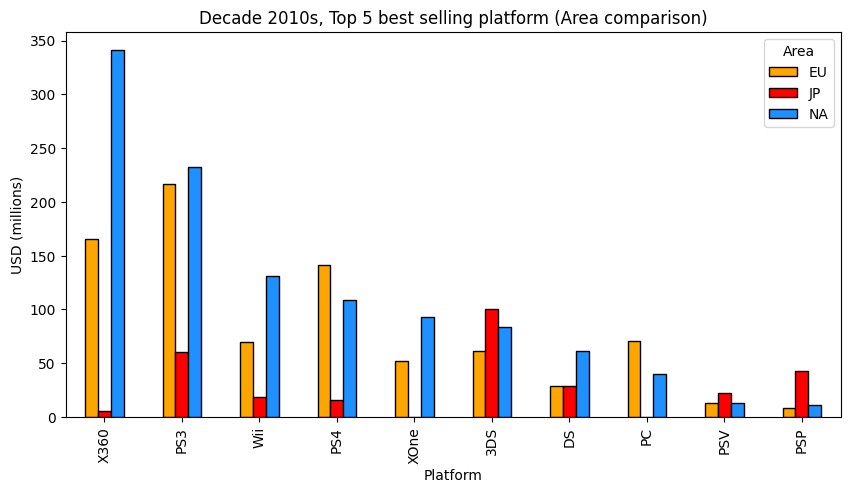

In [102]:
# Gráfico de mejores ventas de plataforma por área
plt_area_pvt.plot(figsize=(10,5), kind='bar', ec='black',color=['orange','red','dodgerblue'])

plt.title("Decade 2010s, Top 5 best selling platform (Area comparison)")
plt.xlabel("Platform")
plt.ylabel("USD (millions)")
plt.legend(['EU','JP','NA'], title='Area')

plt.show()

En conclusión con el análisis de ingresos realizado al principio (porcentaje de ventas por región) y el análisis de las plataformas más rentables, el presente gráfico expone en resumen ambos aspectos.

### Los cinco géneros principales. Explica la diferencia.

In [103]:
# Mejores ventas de género por área
t5_gnr_area_lst=['Action','Shooter','Sports','Role-Playing','Misc','Platform']

gnr_area_fltr =games17[games17['genre'].isin(t5_gnr_area_lst)]

gnr_area_pvt=gnr_area_fltr.pivot_table(index='genre',
                             values=['na_sales','eu_sales','jp_sales'],
                             aggfunc='sum'
                            ).fillna(0)

gnr_area_pvt=gnr_area_pvt.sort_values('na_sales',ascending=False)
gnr_area_pvt

,eu_sales,jp_sales,na_sales
genre,,,
Action,240.01,73.24,300.39
Shooter,173.76,14.12,240.56
Sports,121.39,15.95,166.80
Misc,68.06,25.38,130.52
Role-Playing,75.95,105.16,112.81
Platform,38.89,15.93,55.12


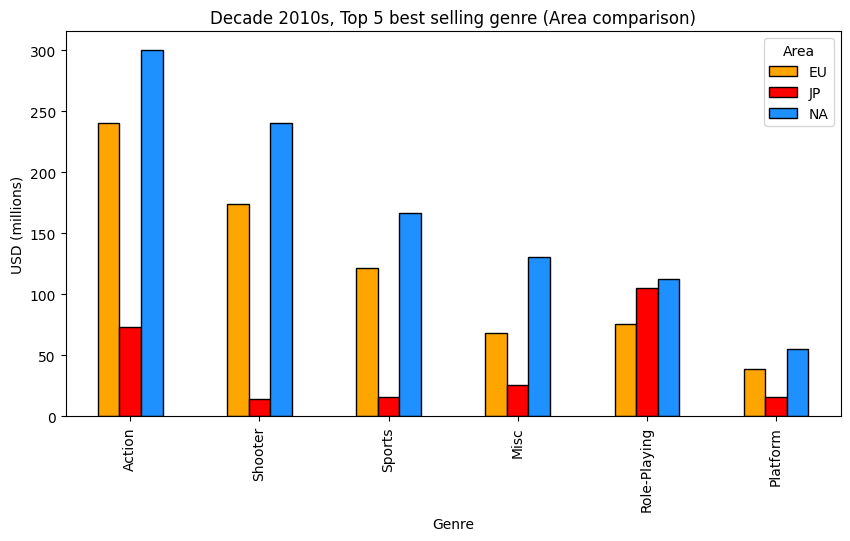

In [104]:
# Gráfico de mejores ventas de género por área
gnr_area_pvt.plot(figsize=(10,5), kind='bar', ec='black',color=['orange','red','dodgerblue'])

plt.title("Decade 2010s, Top 5 best selling genre (Area comparison)")
plt.xlabel("Genre")
plt.ylabel("USD (millions)")
plt.legend(['EU','JP','NA'], title='Area')

plt.show()

En conclusión con el análisis de géneros (géneros de mayor consumo) y el análisis de las plataformas más rentables, el presente gráfico expone en resumen ambos aspectos.

### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [105]:
# Mejores ventas de rating por área
rtng_area=games17.pivot_table(index=['rating_def'],
                             values=['na_sales','eu_sales','jp_sales'],
                             aggfunc='sum'
                            ).fillna(0)

rtng_area=rtng_area.sort_values('na_sales',ascending=False)
rtng_area

,eu_sales,jp_sales,na_sales
rating_def,,,
M,307.79,32.94,397.52
E,207.90,49.83,290.25
T,121.04,48.56,176.69
E10+,107.82,13.61,170.61
EC,0.00,0.00,1.64
RP,0.08,0.00,0.00


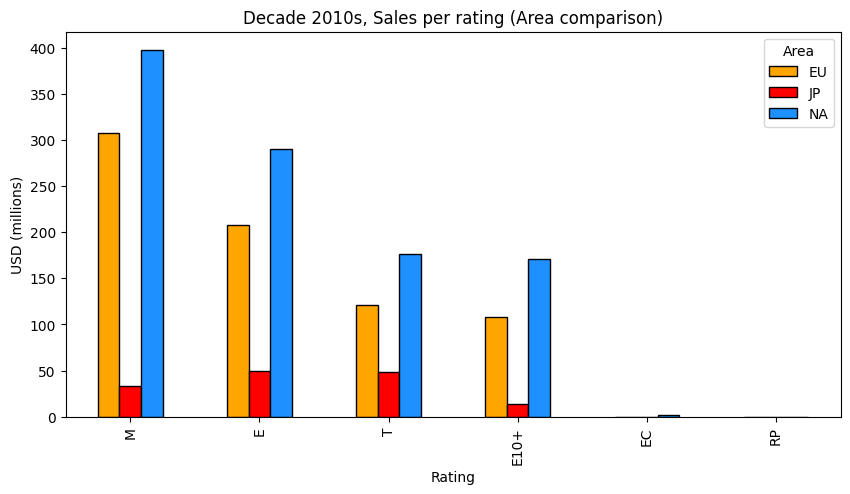

In [106]:
# Gráfico de mejores ventas de rating por área
rtng_area.plot(figsize=(10,5), kind='bar', ec='black',color=['orange','red','dodgerblue'])

plt.title("Decade 2010s, Sales per rating (Area comparison)")
plt.xlabel("Rating")
plt.ylabel("USD (millions)")
plt.legend(['EU','JP','NA'], title='Area')

plt.show()

Aunque no hay análisis previo en cuanto a clasificaciones, se aprecia que el consumo más importante resulta de las regiones NA y EU referentes a "Mature 17+" seguido de "Everyone", "Teen" y "Everyone 10+".

Perfil 1.

NA. Plataforma de casa Microsoft, genero Acción, clasificación M.

EU. Plataforma de casa Sony, genero Acción, clasificación M.

JP. Plataforma portátil Nintendo, genero Juego de rol, clasificación E.

Perfil 2.

NA. Plataforma de casa Sony, genero Tirador, clasificación E.

EU. Plataforma de casa Microsoft, genero Tirador, clasificación E.

JP. Plataforma de casa Sony, genero Acción, clasificación Teen.

Se concluye que los perfiles de NA y EU son prácticamente el mismo con una leve diferencia en cuanto a las preferencias entre las plataformas de casa de Microsoft y Sony, clasificaciones M y E, en especial Acción y Tirador.

En el caso de JP, el público prefiere en una primera instancia la consola portátil de Nintendo o la plataforma de casa de Sony, con clasificaciones Teen y E, en especial Juegos de rol y Acción.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


Felicidades por tu excelente trabajo comparando información de videojuegos entre regiones. El uso de herramientas de visualización para este propósito es una estrategia clave, ya que permite identificar rápidamente patrones, tendencias y diferencias que podrían pasar desapercibidas con datos en bruto. Tus visualizaciones no solo facilitan el análisis comparativo, sino que también mejoran la comprensión y comunicación de los hallazgos, ayudando a destacar insights críticos de forma clara y efectiva. 

</div>

# Paso 5. Prueba las siguientes hipótesis:

### — Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
### Establece tu mismo el valor de umbral alfa.

H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales

H1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes

alpha = 0.05

In [107]:
# Comprobación de hipótesis de plataformas
mean_usr_scr_xone_fltr = games.query("platform == 'XOne'")['user_score']
mean_usr_scr_pc_fltr= games.query("platform == 'PC'")['user_score']
alpha = 0.05

h0_plt = st.ttest_ind(mean_usr_scr_xone_fltr,mean_usr_scr_pc_fltr,equal_var=False)

print('valor p :', h0_plt.pvalue)

if (h0_plt.pvalue<alpha):
    print("Rechazamos la hipótesis nula, existe una diferencia significativa entre las calificaciones promedio de XOne y PC")
else:
    print("No podemos rechazar la hipótesis nula, la diferencia entre as calificaciones promedio de XOne y PC no es significativa")

valor p : 4.964162612622159e-05
Rechazamos la hipótesis nula, existe una diferencia significativa entre las calificaciones promedio de XOne y PC


### — Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
### Establece tu mismo el valor de umbral alfa.

H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales

H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

alpha = 0.05

In [108]:
# Comprobación de hipótesis de géneros
mean_usr_scr_action_fltr = games.query("genre == 'Action'")['user_score']
mean_usr_scr_sports_fltr = games.query("genre == 'Sports'")['user_score']
alpha = 0.05

h0_gnr = st.ttest_ind(mean_usr_scr_action_fltr,mean_usr_scr_sports_fltr,equal_var=False)

print('valor p:', h0_gnr.pvalue)

if (h0_gnr.pvalue<alpha):
    print("Rechazamos la hipótesis nula H0, existe una diferencia significativa entre las calificaciones promedio de Acción y Deportes")
else:
    print("No podemos rechazar la hipótesis nula, la diferencia entre as calificaciones promedio de Acción y Deportes no es significativa")

valor p: 0.7159128316394157
No podemos rechazar la hipótesis nula, la diferencia entre as calificaciones promedio de Acción y Deportes no es significativa


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo en la implementación de la metodología para la prueba de hipótesis! La forma estructurada y rigurosa en que abordaste el problema demuestra un gran dominio del proceso estadístico y un compromiso por garantizar resultados confiables. Aplicar una metodología sólida no solo fortalece la validez de tus conclusiones, sino que también refleja un enfoque profesional al análisis de datos. Este tipo de rigor es esencial para tomar decisiones basadas en evidencia y da un gran valor añadido a tu proyecto.

</div>

### Explica:
### — Cómo formulaste las hipótesis nula y alternativa.
### — Qué criterio utilizaste para probar las hipótesis y por qué.

Se plantean las hipótesis nulas con la igualdad de los datos solicitados, en el primer caso entre plataformas y en el segundo entre géneros y las hipótesis alternativas en contraposición.

Se toma alpha como 0.05 de manera práctica.

# Paso 6. Escribe una conclusión general

### Formato: Completa la tarea en Jupyter Notebook. Inserta el código de programación en las celdas code y las explicaciones de texto en las celdas markdown. Aplica formato y agrega encabezados.

Me pareció una buena práctica, abarcando conocimientos desde el principio del curso hasta el presente sprint, el hecho de empezar en un notebook completamente limpio también representó un reto. 

Sigue habiendo una línea de estudio a seguir, la cual nos lleva a un objetivo común y a pesar de ello parecen existir diversidad de opciones para la consecución de los resultados.

En mi caso muy particular, opté por algunos pasos adicionales en el enriquecimiento de la información, datos como:

* Desarrollador
* Nombre de la Plataforma
* Año de lanzamiento definitivo
* Década
* Número de lanzamientos por título
* Número de años de lanzamientos por título
* Clasificación definitiva
* Calificación de usuarios de 1 a 100

Que si bien representaban importes mínimos para el análisis, de alguna manera suman para un análisis más detallado y para el aprendizaje de cómo realizar dichas actividades.

Fuera del aspecto de programación, practicar las explicaciones para mejorar las habilidades de interpretación de datos, tanto tablas como gráficos.

Me gustaría saber cómo optimizar procesos de obtención de información y utilización múltiple.

Gracias.